In [1]:
%%capture
!pip install gcpds-cv-pykit==0.1.0.59

In [2]:
import torch
from gcpds_cv_pykit.datasets import OxfordIITPet_Crowd, BreastCancer_Crowd
from gcpds_cv_pykit.crowd.dataloaders import AnnotHarmonyDataloader
from gcpds_cv_pykit.visuals import random_sample_visualization
from gcpds_cv_pykit.crowd.trainers import AnnotHarmonyTrainer
from gcpds_cv_pykit.crowd.models import AnnotHarmonyModel
from gcpds_cv_pykit.crowd.performance import PerformanceAnnotHarmony

In [3]:
# Set a seed
seed = 42

torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [4]:
BreastCancer_Crowd()

100%|██████████| 610M/610M [00:06<00:00, 97.6MB/s]

Extracting files...


Path to downloaded dataset files: /root/.cache/kagglehub/datasets/lucasiturriago/breast-cancer-multi-annotators/versions/4
Dataset copied to: /content/datasets/breast-cancer-multi-annotators
Original folder '/root/.cache/kagglehub/datasets/lucasiturriago/breast-cancer-multi-annotators/versions/4' deleted.


'/content/datasets/breast-cancer-multi-annotators'

In [7]:
config = {"Dir of dataset": "/content/datasets/breast-cancer-multi-annotators", "Batch size": 36,
          "Image size": (256,256), "Input size": (3,256,256),"Number of classes": 3, "Num of annotators": 20,"Single class train": None,
          "Single class test": None,"Single class valid": None, "Images folder": "patches","Data augmentation": True, "Epochs": 61,
          "Device": "cuda:0", "AMixPre": True, "Model": "AnnotHarmony", "Backbone": "resnet34","Pretrained": True, "Train phases": True,
          "Activation seg": "sparse_softmax", "Activation rel": "softmax", "Loss function": "TGCE_SS", "Save results": True,
          "Ground truth train":True,"Ground truth valid":True,"Ground truth test":True,"Annotators train":True,"Annotators valid":True,
          "Annotators test":True, "Q parameter": 0.7243854912956864,
          "Wandb monitoring": ["5092b6e1a9fb50d7448b32f2db4d0163bb5ef14f","MasterTests","BreastCancer_Crowd-AnnotHarmony-TGCE_SS"]}

In [8]:
train_dataset = AnnotHarmonyDataloader(
    data_dir=config['Dir of dataset'],
    batch_size=config['Batch size'],
    image_size=config['Image size'],
    num_classes=config['Number of classes'],
    num_annotators=config['Num of annotators'],
    partition='Train',
    annotators=config['Annotators train'],
    ground_truth=config['Ground truth train'],
    single_class=config['Single class train'],
    augment=True,
    num_workers=4)

[INFO] Found 2268 patch files in /content/datasets/breast-cancer-multi-annotators/Train/patches/*.png


Organizing masks:   0%|          | 0/2268 [00:00<?, ?it/s]

Organizing GT masks:   0%|          | 0/2268 [00:00<?, ?it/s]

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:627: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [9]:
valid_dataset = AnnotHarmonyDataloader(
    data_dir=config['Dir of dataset'],
    batch_size=config['Batch size'],
    image_size=config['Image size'],
    num_classes=config['Number of classes'],
    num_annotators=config['Num of annotators'],
    partition='Valid',
    annotators=config['Annotators valid'],
    ground_truth=config['Ground truth valid'],
    single_class=config['Single class valid'],
    augment=False,
    num_workers=4)

[INFO] Found 278 patch files in /content/datasets/breast-cancer-multi-annotators/Valid/patches/*.png


Organizing masks:   0%|          | 0/278 [00:00<?, ?it/s]

Organizing GT masks:   0%|          | 0/278 [00:00<?, ?it/s]

In [10]:
test_dataset = AnnotHarmonyDataloader(
    data_dir=config['Dir of dataset'],
    batch_size=config['Batch size'],
    image_size=config['Image size'],
    num_classes=config['Number of classes'],
    num_annotators=config['Num of annotators'],
    partition='Test',
    annotators=config['Annotators test'],
    ground_truth=config['Ground truth test'],
    single_class=config['Single class test'],
    augment=False,
    num_workers=4)

[INFO] Found 267 patch files in /content/datasets/breast-cancer-multi-annotators/Test/patches/*.png


Organizing masks:   0%|          | 0/267 [00:00<?, ?it/s]

Organizing GT masks:   0%|          | 0/267 [00:00<?, ?it/s]

Images: torch.Size([36, 3, 256, 256]), AnnsMasks: torch.Size([36, 60, 256, 256]), AnnsOneHot: torch.Size([36, 20]), GT: torch.Size([36, 3, 256, 256])


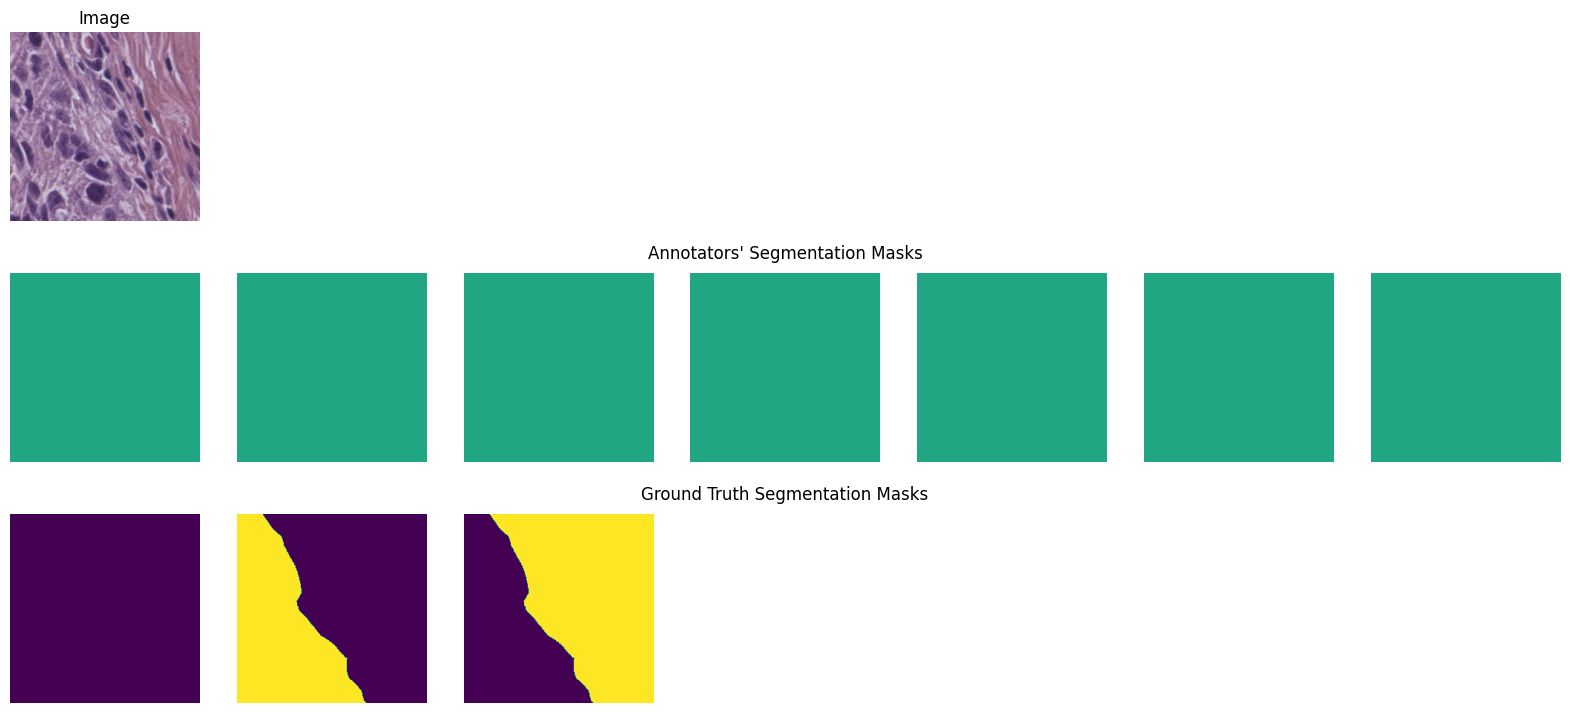

In [ ]:
random_sample_visualization(dataset=train_dataset, num_classes=config["Number of classes"],annotators=True,
                            num_annotators=config['Num of annotators'],type='annot_harmony',
                            single_class=config['Single class train'], ground_truth=config["Ground truth train"])

Automatic Mixed Precision (AMP) enabled.
DEVICE INFORMATION
Current device: cuda:0
Device type: cuda
CUDA available: Yes
CUDA version: 12.4
Number of CUDA devices: 1
Current CUDA device index: 0
Current CUDA device name: Tesla P100-PCIE-16GB
GPU Memory - Allocated: 0.00 GB
GPU Memory - Reserved: 0.00 GB
GPU Memory - Total: 15.89 GB
GPU Compute Capability: 6.0
GPU Multiprocessors: 56
PyTorch version: 2.6.0+cu124


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 106MB/s]
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: liturriago (gcpds) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin
wandb: Tracking run with wandb version 0.20.1
wandb: Run data is saved locally in /kaggle/working/wandb/run-20250910_050413-r2qz6tqr
wandb: Run `wandb offline` to turn off syncing.
wandb: Syncing run BreastCancer_Crowd-AnnotHarmony-TGCE_SS
wandb: ⭐️ View project at https://wandb.ai/gcpds/MasterTests
wandb: 🚀 View run at https://wandb.ai/gcpds/MasterTests/runs/r


Epoch 1/61
Training phase 1


Validation Epoch 1/61: 100%|██████████| 8/8 [00:15<00:00,  1.99s/it]


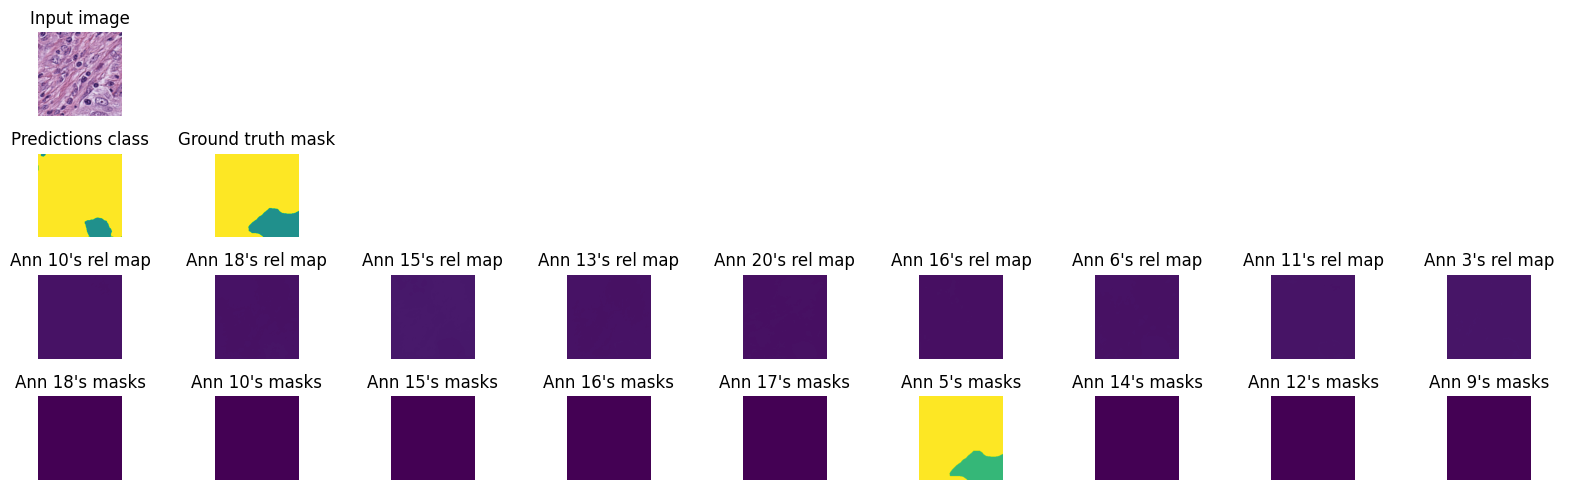

Train loss: 0.72596 | Time: 2m 23s | Val loss: 0.72566
Train_DICE_avg: 0.48310 | Train_Jaccard_avg: 0.39596 | Train_Sensitivity_avg: 0.55214 | Train_Specificity_avg: 0.85023 
Class 0 - Train_DICE: 0.34954 | Train_Jaccard: 0.34916 | Train_Sensitivity: 0.56083 | Train_Specificity: 0.99912 
Class 1 - Train_DICE: 0.63442 | Train_Jaccard: 0.49486 | Train_Sensitivity: 0.65645 | Train_Specificity: 0.70865 
Class 2 - Train_DICE: 0.46533 | Train_Jaccard: 0.34386 | Train_Sensitivity: 0.43915 | Train_Specificity: 0.84293 
Val_DICE_avg: 0.61238 | Val_Jaccard_avg: 0.52824 | Val_Sensitivity_avg: 0.63374 | Val_Specificity_avg: 0.83365 
Class 0 - Val_DICE: 0.54113 | Val_Jaccard: 0.54113 | Val_Sensitivity: 0.54113 | Val_Specificity: 1.00000 
Class 1 - Val_DICE: 0.72049 | Val_Jaccard: 0.59030 | Val_Sensitivity: 0.76947 | Val_Specificity: 0.69870 
Class 2 - Val_DICE: 0.57551 | Val_Jaccard: 0.45330 | Val_Sensitivity: 0.59060 | Val_Specificity: 0.80224 

Epoch 2/61


Training Epoch 2/61:   3%|▎         | 2/63 [00:06<02:42,  2.66s/it]wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
wandb: WARNING Tried to log to step 0 that is less than the current step 1. Steps must be monotonically increasing, so this data will be ignored. See https://wandb.me/define-metric to log data out of order.
Validation Epoch 2/61: 100%|██████████| 8/8 [00:10<00:00,  1.32s/it]


Train loss: 0.72315 | Time: 4m 3s | Val loss: 0.71894
Train_DICE_avg: 0.58432 | Train_Jaccard_avg: 0.49593 | Train_Sensitivity_avg: 0.62707 | Train_Specificity_avg: 0.84973 
Class 0 - Train_DICE: 0.47193 | Train_Jaccard: 0.46811 | Train_Sensitivity: 0.57117 | Train_Specificity: 0.99784 
Class 1 - Train_DICE: 0.69283 | Train_Jaccard: 0.56158 | Train_Sensitivity: 0.71950 | Train_Specificity: 0.74391 
Class 2 - Train_DICE: 0.58821 | Train_Jaccard: 0.45809 | Train_Sensitivity: 0.59053 | Train_Specificity: 0.80745 
Val_DICE_avg: 0.58761 | Val_Jaccard_avg: 0.49798 | Val_Sensitivity_avg: 0.63598 | Val_Specificity_avg: 0.84412 
Class 0 - Val_DICE: 0.46924 | Val_Jaccard: 0.45543 | Val_Sensitivity: 0.57716 | Val_Specificity: 0.98483 
Class 1 - Val_DICE: 0.71832 | Val_Jaccard: 0.58829 | Val_Sensitivity: 0.74588 | Val_Specificity: 0.73565 
Class 2 - Val_DICE: 0.57527 | Val_Jaccard: 0.45023 | Val_Sensitivity: 0.58491 | Val_Specificity: 0.81188 

Epoch 3/61


Validation Epoch 3/61: 100%|██████████| 8/8 [00:09<00:00,  1.22s/it]


Train loss: 0.70925 | Time: 5m 41s | Val loss: 0.69633
Train_DICE_avg: 0.58052 | Train_Jaccard_avg: 0.49314 | Train_Sensitivity_avg: 0.61518 | Train_Specificity_avg: 0.85229 
Class 0 - Train_DICE: 0.49793 | Train_Jaccard: 0.49340 | Train_Sensitivity: 0.57196 | Train_Specificity: 0.99737 
Class 1 - Train_DICE: 0.69158 | Train_Jaccard: 0.56025 | Train_Sensitivity: 0.72023 | Train_Specificity: 0.74623 
Class 2 - Train_DICE: 0.55204 | Train_Jaccard: 0.42578 | Train_Sensitivity: 0.55335 | Train_Specificity: 0.81326 
Val_DICE_avg: 0.57204 | Val_Jaccard_avg: 0.48442 | Val_Sensitivity_avg: 0.58821 | Val_Specificity_avg: 0.86548 
Class 0 - Val_DICE: 0.49985 | Val_Jaccard: 0.49111 | Val_Sensitivity: 0.56175 | Val_Specificity: 0.99263 
Class 1 - Val_DICE: 0.67251 | Val_Jaccard: 0.54183 | Val_Sensitivity: 0.66014 | Val_Specificity: 0.78636 
Class 2 - Val_DICE: 0.54375 | Val_Jaccard: 0.42030 | Val_Sensitivity: 0.54273 | Val_Specificity: 0.81746 

Epoch 4/61


Validation Epoch 4/61: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


Train loss: 0.69482 | Time: 7m 17s | Val loss: 0.68248
Train_DICE_avg: 0.58593 | Train_Jaccard_avg: 0.49383 | Train_Sensitivity_avg: 0.62510 | Train_Specificity_avg: 0.84940 
Class 0 - Train_DICE: 0.50211 | Train_Jaccard: 0.49031 | Train_Sensitivity: 0.59353 | Train_Specificity: 0.99121 
Class 1 - Train_DICE: 0.67951 | Train_Jaccard: 0.54794 | Train_Sensitivity: 0.69659 | Train_Specificity: 0.76072 
Class 2 - Train_DICE: 0.57617 | Train_Jaccard: 0.44325 | Train_Sensitivity: 0.58518 | Train_Specificity: 0.79626 
Val_DICE_avg: 0.57614 | Val_Jaccard_avg: 0.48737 | Val_Sensitivity_avg: 0.59766 | Val_Specificity_avg: 0.87715 
Class 0 - Val_DICE: 0.48209 | Val_Jaccard: 0.47009 | Val_Sensitivity: 0.57573 | Val_Specificity: 0.98654 
Class 1 - Val_DICE: 0.64743 | Val_Jaccard: 0.51783 | Val_Sensitivity: 0.61345 | Val_Specificity: 0.82759 
Class 2 - Val_DICE: 0.59892 | Val_Jaccard: 0.47419 | Val_Sensitivity: 0.60380 | Val_Specificity: 0.81733 

Epoch 5/61


Validation Epoch 5/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.68374 | Time: 8m 54s | Val loss: 0.66327
Train_DICE_avg: 0.60855 | Train_Jaccard_avg: 0.51689 | Train_Sensitivity_avg: 0.64906 | Train_Specificity_avg: 0.84412 
Class 0 - Train_DICE: 0.52131 | Train_Jaccard: 0.50880 | Train_Sensitivity: 0.59699 | Train_Specificity: 0.99010 
Class 1 - Train_DICE: 0.69373 | Train_Jaccard: 0.56357 | Train_Sensitivity: 0.71773 | Train_Specificity: 0.75721 
Class 2 - Train_DICE: 0.61061 | Train_Jaccard: 0.47831 | Train_Sensitivity: 0.63246 | Train_Specificity: 0.78506 
Val_DICE_avg: 0.61345 | Val_Jaccard_avg: 0.52815 | Val_Sensitivity_avg: 0.64196 | Val_Specificity_avg: 0.83744 
Class 0 - Val_DICE: 0.52872 | Val_Jaccard: 0.52246 | Val_Sensitivity: 0.55559 | Val_Specificity: 0.99600 
Class 1 - Val_DICE: 0.73992 | Val_Jaccard: 0.61171 | Val_Sensitivity: 0.80938 | Val_Specificity: 0.67354 
Class 2 - Val_DICE: 0.57171 | Val_Jaccard: 0.45028 | Val_Sensitivity: 0.56089 | Val_Specificity: 0.84277 

Epoch 6/61


Validation Epoch 6/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


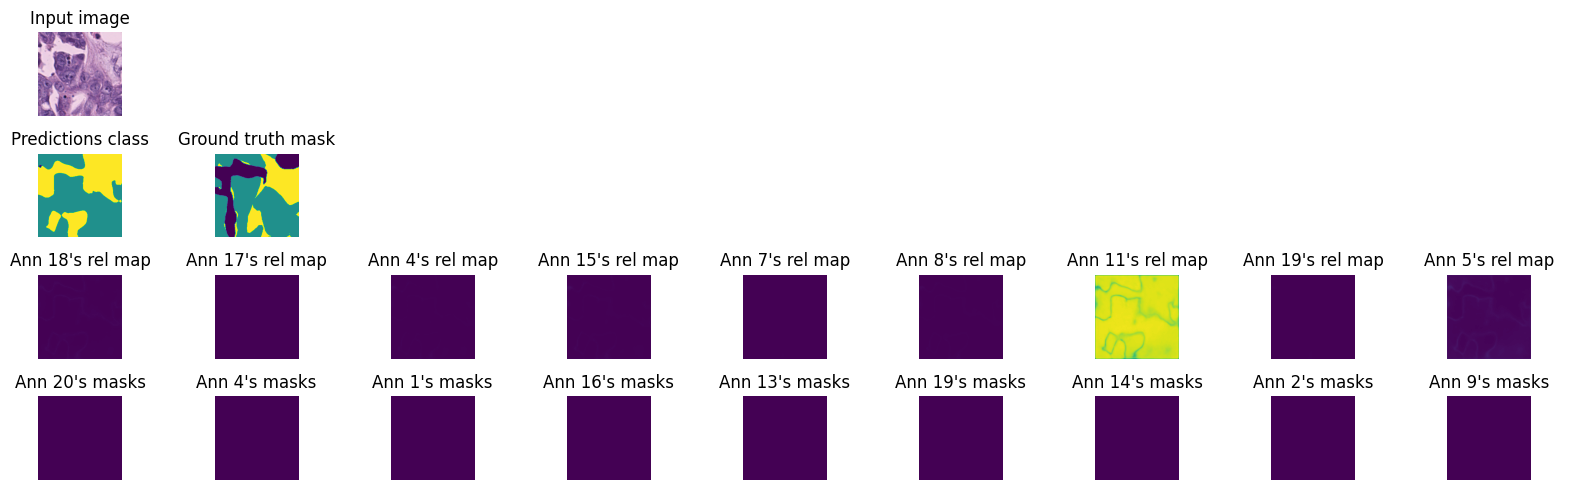

Train loss: 0.67585 | Time: 10m 32s | Val loss: 0.64675
Train_DICE_avg: 0.62250 | Train_Jaccard_avg: 0.53316 | Train_Sensitivity_avg: 0.66932 | Train_Specificity_avg: 0.82974 
Class 0 - Train_DICE: 0.52939 | Train_Jaccard: 0.51801 | Train_Sensitivity: 0.59041 | Train_Specificity: 0.99352 
Class 1 - Train_DICE: 0.72005 | Train_Jaccard: 0.59314 | Train_Sensitivity: 0.77297 | Train_Specificity: 0.71515 
Class 2 - Train_DICE: 0.61806 | Train_Jaccard: 0.48833 | Train_Sensitivity: 0.64457 | Train_Specificity: 0.78054 
Val_DICE_avg: 0.63712 | Val_Jaccard_avg: 0.55164 | Val_Sensitivity_avg: 0.68016 | Val_Specificity_avg: 0.83246 
Class 0 - Val_DICE: 0.51787 | Val_Jaccard: 0.50926 | Val_Sensitivity: 0.56543 | Val_Specificity: 0.99427 
Class 1 - Val_DICE: 0.74720 | Val_Jaccard: 0.62404 | Val_Sensitivity: 0.77977 | Val_Specificity: 0.74300 
Class 2 - Val_DICE: 0.64629 | Val_Jaccard: 0.52161 | Val_Sensitivity: 0.69528 | Val_Specificity: 0.76010 

Epoch 7/61


Validation Epoch 7/61: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


Train loss: 0.66701 | Time: 12m 10s | Val loss: 0.63048
Train_DICE_avg: 0.61811 | Train_Jaccard_avg: 0.52804 | Train_Sensitivity_avg: 0.68135 | Train_Specificity_avg: 0.83053 
Class 0 - Train_DICE: 0.49767 | Train_Jaccard: 0.48493 | Train_Sensitivity: 0.59775 | Train_Specificity: 0.99317 
Class 1 - Train_DICE: 0.72340 | Train_Jaccard: 0.59686 | Train_Sensitivity: 0.76945 | Train_Specificity: 0.73385 
Class 2 - Train_DICE: 0.63327 | Train_Jaccard: 0.50232 | Train_Sensitivity: 0.67684 | Train_Specificity: 0.76455 
Val_DICE_avg: 0.60258 | Val_Jaccard_avg: 0.51688 | Val_Sensitivity_avg: 0.67069 | Val_Specificity_avg: 0.82277 
Class 0 - Val_DICE: 0.47410 | Val_Jaccard: 0.46056 | Val_Sensitivity: 0.58648 | Val_Specificity: 0.98580 
Class 1 - Val_DICE: 0.75886 | Val_Jaccard: 0.63381 | Val_Sensitivity: 0.85679 | Val_Specificity: 0.63859 
Class 2 - Val_DICE: 0.57478 | Val_Jaccard: 0.45627 | Val_Sensitivity: 0.56881 | Val_Specificity: 0.84393 

Epoch 8/61


Validation Epoch 8/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.65061 | Time: 13m 45s | Val loss: 0.59003
Train_DICE_avg: 0.62722 | Train_Jaccard_avg: 0.53677 | Train_Sensitivity_avg: 0.67536 | Train_Specificity_avg: 0.83060 
Class 0 - Train_DICE: 0.53496 | Train_Jaccard: 0.52352 | Train_Sensitivity: 0.59313 | Train_Specificity: 0.99305 
Class 1 - Train_DICE: 0.71513 | Train_Jaccard: 0.58719 | Train_Sensitivity: 0.75722 | Train_Specificity: 0.74125 
Class 2 - Train_DICE: 0.63158 | Train_Jaccard: 0.49960 | Train_Sensitivity: 0.67571 | Train_Specificity: 0.75751 
Val_DICE_avg: 0.64076 | Val_Jaccard_avg: 0.55521 | Val_Sensitivity_avg: 0.67735 | Val_Specificity_avg: 0.82693 
Class 0 - Val_DICE: 0.54803 | Val_Jaccard: 0.54108 | Val_Sensitivity: 0.56127 | Val_Specificity: 0.99548 
Class 1 - Val_DICE: 0.73047 | Val_Jaccard: 0.60604 | Val_Sensitivity: 0.75874 | Val_Specificity: 0.75106 
Class 2 - Val_DICE: 0.64379 | Val_Jaccard: 0.51852 | Val_Sensitivity: 0.71206 | Val_Specificity: 0.73424 

Epoch 9/61


Validation Epoch 9/61: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]


Train loss: 0.63079 | Time: 15m 21s | Val loss: 0.54481
Train_DICE_avg: 0.63594 | Train_Jaccard_avg: 0.54825 | Train_Sensitivity_avg: 0.67509 | Train_Specificity_avg: 0.82880 
Class 0 - Train_DICE: 0.56061 | Train_Jaccard: 0.55483 | Train_Sensitivity: 0.57642 | Train_Specificity: 0.99828 
Class 1 - Train_DICE: 0.71127 | Train_Jaccard: 0.58501 | Train_Sensitivity: 0.75709 | Train_Specificity: 0.74060 
Class 2 - Train_DICE: 0.63593 | Train_Jaccard: 0.50492 | Train_Sensitivity: 0.69176 | Train_Specificity: 0.74752 
Val_DICE_avg: 0.63653 | Val_Jaccard_avg: 0.55242 | Val_Sensitivity_avg: 0.67327 | Val_Specificity_avg: 0.82734 
Class 0 - Val_DICE: 0.53972 | Val_Jaccard: 0.53521 | Val_Sensitivity: 0.54930 | Val_Specificity: 0.99924 
Class 1 - Val_DICE: 0.74397 | Val_Jaccard: 0.62034 | Val_Sensitivity: 0.80071 | Val_Specificity: 0.71328 
Class 2 - Val_DICE: 0.62591 | Val_Jaccard: 0.50171 | Val_Sensitivity: 0.66981 | Val_Specificity: 0.76949 

Epoch 10/61


Validation Epoch 10/61: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


Train loss: 0.60467 | Time: 16m 56s | Val loss: 0.49700
Train_DICE_avg: 0.64509 | Train_Jaccard_avg: 0.55794 | Train_Sensitivity_avg: 0.68546 | Train_Specificity_avg: 0.83048 
Class 0 - Train_DICE: 0.55900 | Train_Jaccard: 0.55410 | Train_Sensitivity: 0.57177 | Train_Specificity: 0.99910 
Class 1 - Train_DICE: 0.71735 | Train_Jaccard: 0.59126 | Train_Sensitivity: 0.74148 | Train_Specificity: 0.77551 
Class 2 - Train_DICE: 0.65894 | Train_Jaccard: 0.52845 | Train_Sensitivity: 0.74313 | Train_Specificity: 0.71682 
Val_DICE_avg: 0.64138 | Val_Jaccard_avg: 0.55746 | Val_Sensitivity_avg: 0.68510 | Val_Specificity_avg: 0.82410 
Class 0 - Val_DICE: 0.53368 | Val_Jaccard: 0.52903 | Val_Sensitivity: 0.55094 | Val_Specificity: 0.99719 
Class 1 - Val_DICE: 0.72237 | Val_Jaccard: 0.59952 | Val_Sensitivity: 0.71616 | Val_Specificity: 0.80673 
Class 2 - Val_DICE: 0.66810 | Val_Jaccard: 0.54383 | Val_Sensitivity: 0.78820 | Val_Specificity: 0.66839 

Epoch 11/61
Training phase 2


Validation Epoch 11/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


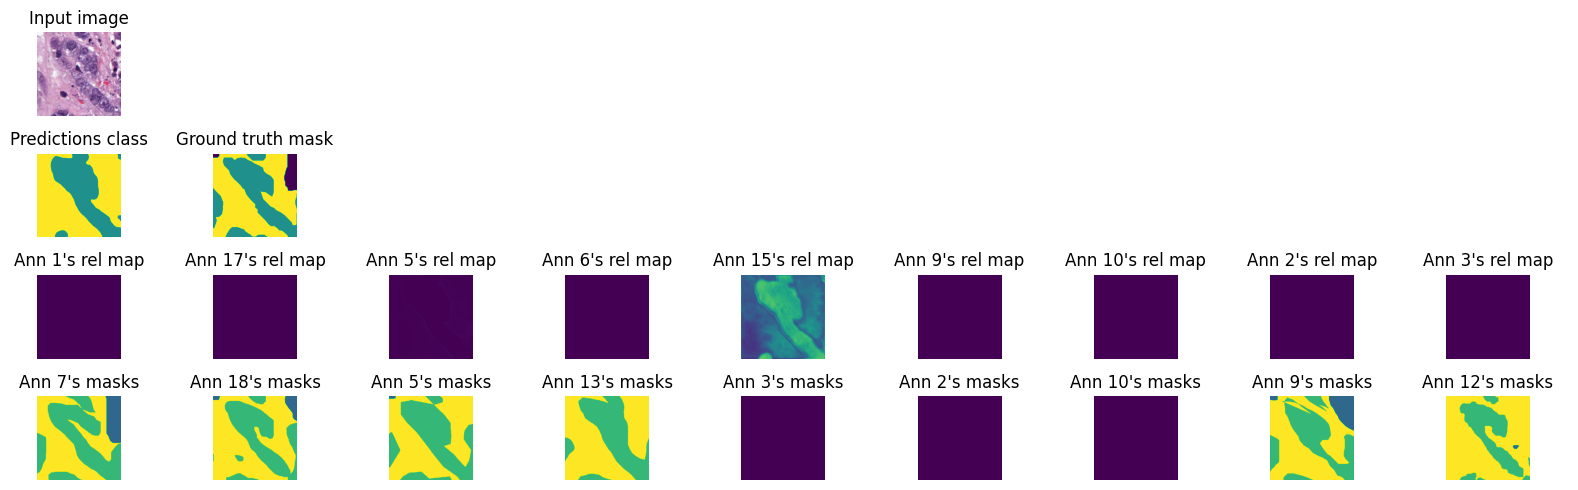

Train loss: 0.58464 | Time: 18m 34s | Val loss: 0.46624
Train_DICE_avg: 0.64922 | Train_Jaccard_avg: 0.56276 | Train_Sensitivity_avg: 0.69080 | Train_Specificity_avg: 0.83030 
Class 0 - Train_DICE: 0.55934 | Train_Jaccard: 0.55410 | Train_Sensitivity: 0.57304 | Train_Specificity: 0.99784 
Class 1 - Train_DICE: 0.72238 | Train_Jaccard: 0.59806 | Train_Sensitivity: 0.73964 | Train_Specificity: 0.78523 
Class 2 - Train_DICE: 0.66594 | Train_Jaccard: 0.53613 | Train_Sensitivity: 0.75973 | Train_Specificity: 0.70784 
Val_DICE_avg: 0.65424 | Val_Jaccard_avg: 0.57094 | Val_Sensitivity_avg: 0.69775 | Val_Specificity_avg: 0.83491 
Class 0 - Val_DICE: 0.53523 | Val_Jaccard: 0.52851 | Val_Sensitivity: 0.55873 | Val_Specificity: 0.99596 
Class 1 - Val_DICE: 0.75362 | Val_Jaccard: 0.63247 | Val_Sensitivity: 0.76440 | Val_Specificity: 0.79121 
Class 2 - Val_DICE: 0.67386 | Val_Jaccard: 0.55183 | Val_Sensitivity: 0.77010 | Val_Specificity: 0.71755 

Epoch 12/61


Validation Epoch 12/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.56330 | Time: 20m 11s | Val loss: 0.42765
Train_DICE_avg: 0.65116 | Train_Jaccard_avg: 0.56461 | Train_Sensitivity_avg: 0.69303 | Train_Specificity_avg: 0.83057 
Class 0 - Train_DICE: 0.55887 | Train_Jaccard: 0.55315 | Train_Sensitivity: 0.57146 | Train_Specificity: 0.99831 
Class 1 - Train_DICE: 0.73203 | Train_Jaccard: 0.60782 | Train_Sensitivity: 0.76477 | Train_Specificity: 0.76574 
Class 2 - Train_DICE: 0.66258 | Train_Jaccard: 0.53287 | Train_Sensitivity: 0.74285 | Train_Specificity: 0.72766 
Val_DICE_avg: 0.65982 | Val_Jaccard_avg: 0.57731 | Val_Sensitivity_avg: 0.70118 | Val_Specificity_avg: 0.83624 
Class 0 - Val_DICE: 0.53954 | Val_Jaccard: 0.53337 | Val_Sensitivity: 0.55561 | Val_Specificity: 0.99706 
Class 1 - Val_DICE: 0.78179 | Val_Jaccard: 0.66101 | Val_Sensitivity: 0.84582 | Val_Specificity: 0.72149 
Class 2 - Val_DICE: 0.65812 | Val_Jaccard: 0.53755 | Val_Sensitivity: 0.70212 | Val_Specificity: 0.79017 

Epoch 13/61


Validation Epoch 13/61: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]


Train loss: 0.54449 | Time: 21m 48s | Val loss: 0.38870
Train_DICE_avg: 0.65882 | Train_Jaccard_avg: 0.57273 | Train_Sensitivity_avg: 0.70012 | Train_Specificity_avg: 0.83482 
Class 0 - Train_DICE: 0.56692 | Train_Jaccard: 0.55972 | Train_Sensitivity: 0.58216 | Train_Specificity: 0.99798 
Class 1 - Train_DICE: 0.74837 | Train_Jaccard: 0.62533 | Train_Sensitivity: 0.79329 | Train_Specificity: 0.75154 
Class 2 - Train_DICE: 0.66117 | Train_Jaccard: 0.53315 | Train_Sensitivity: 0.72491 | Train_Specificity: 0.75494 
Val_DICE_avg: 0.65849 | Val_Jaccard_avg: 0.57621 | Val_Sensitivity_avg: 0.70333 | Val_Specificity_avg: 0.83673 
Class 0 - Val_DICE: 0.53201 | Val_Jaccard: 0.52607 | Val_Sensitivity: 0.55525 | Val_Specificity: 0.99721 
Class 1 - Val_DICE: 0.77036 | Val_Jaccard: 0.65053 | Val_Sensitivity: 0.80059 | Val_Specificity: 0.76779 
Class 2 - Val_DICE: 0.67310 | Val_Jaccard: 0.55204 | Val_Sensitivity: 0.75413 | Val_Specificity: 0.74519 

Epoch 14/61


Validation Epoch 14/61: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]


Train loss: 0.52607 | Time: 23m 24s | Val loss: 0.35008
Train_DICE_avg: 0.66254 | Train_Jaccard_avg: 0.57772 | Train_Sensitivity_avg: 0.70214 | Train_Specificity_avg: 0.83846 
Class 0 - Train_DICE: 0.56317 | Train_Jaccard: 0.55622 | Train_Sensitivity: 0.57765 | Train_Specificity: 0.99780 
Class 1 - Train_DICE: 0.75742 | Train_Jaccard: 0.63627 | Train_Sensitivity: 0.80713 | Train_Specificity: 0.74846 
Class 2 - Train_DICE: 0.66703 | Train_Jaccard: 0.54066 | Train_Sensitivity: 0.72164 | Train_Specificity: 0.76913 
Val_DICE_avg: 0.66118 | Val_Jaccard_avg: 0.58031 | Val_Sensitivity_avg: 0.70154 | Val_Specificity_avg: 0.83852 
Class 0 - Val_DICE: 0.53227 | Val_Jaccard: 0.52703 | Val_Sensitivity: 0.55316 | Val_Specificity: 0.99539 
Class 1 - Val_DICE: 0.78093 | Val_Jaccard: 0.66401 | Val_Sensitivity: 0.82127 | Val_Specificity: 0.75203 
Class 2 - Val_DICE: 0.67034 | Val_Jaccard: 0.54989 | Val_Sensitivity: 0.73020 | Val_Specificity: 0.76814 

Epoch 15/61


Validation Epoch 15/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.50969 | Time: 25m 1s | Val loss: 0.32784
Train_DICE_avg: 0.66337 | Train_Jaccard_avg: 0.57871 | Train_Sensitivity_avg: 0.70266 | Train_Specificity_avg: 0.83911 
Class 0 - Train_DICE: 0.56265 | Train_Jaccard: 0.55553 | Train_Sensitivity: 0.57808 | Train_Specificity: 0.99801 
Class 1 - Train_DICE: 0.75750 | Train_Jaccard: 0.63731 | Train_Sensitivity: 0.80406 | Train_Specificity: 0.75327 
Class 2 - Train_DICE: 0.66995 | Train_Jaccard: 0.54330 | Train_Sensitivity: 0.72586 | Train_Specificity: 0.76604 
Val_DICE_avg: 0.66595 | Val_Jaccard_avg: 0.58468 | Val_Sensitivity_avg: 0.70883 | Val_Specificity_avg: 0.84288 
Class 0 - Val_DICE: 0.53608 | Val_Jaccard: 0.52711 | Val_Sensitivity: 0.56483 | Val_Specificity: 0.99513 
Class 1 - Val_DICE: 0.79375 | Val_Jaccard: 0.67700 | Val_Sensitivity: 0.85520 | Val_Specificity: 0.72868 
Class 2 - Val_DICE: 0.66802 | Val_Jaccard: 0.54993 | Val_Sensitivity: 0.70648 | Val_Specificity: 0.80483 

Epoch 16/61


Validation Epoch 16/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


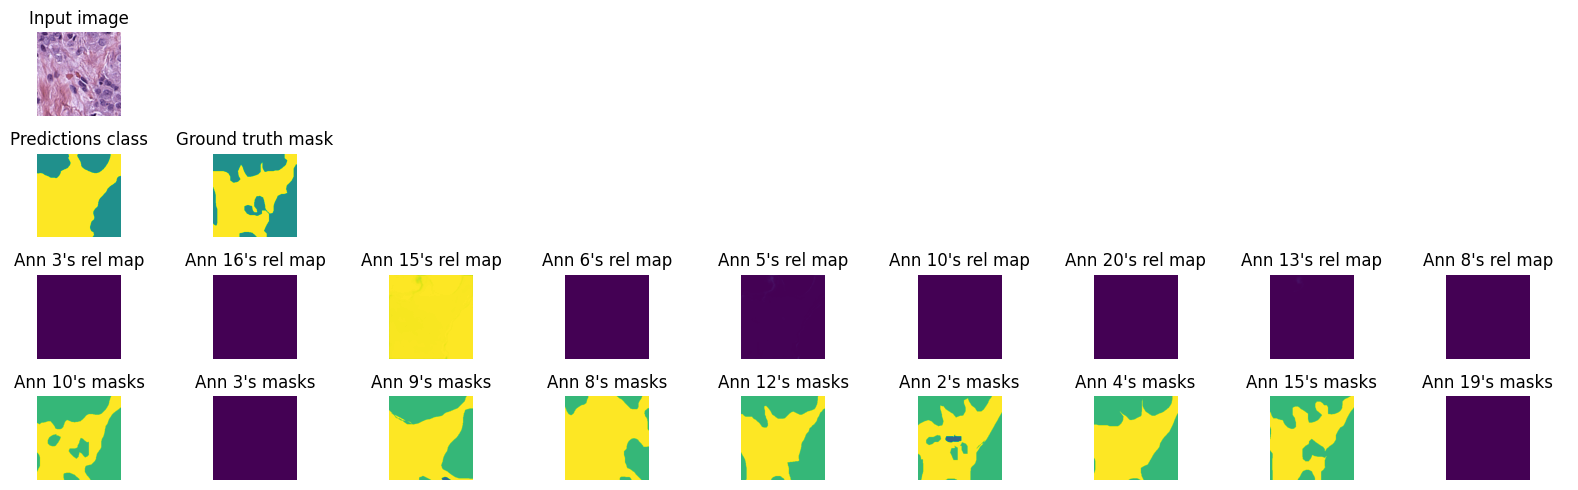

Train loss: 0.49823 | Time: 26m 40s | Val loss: 0.29920
Train_DICE_avg: 0.66625 | Train_Jaccard_avg: 0.58169 | Train_Sensitivity_avg: 0.70653 | Train_Specificity_avg: 0.84130 
Class 0 - Train_DICE: 0.55535 | Train_Jaccard: 0.54889 | Train_Sensitivity: 0.57538 | Train_Specificity: 0.99753 
Class 1 - Train_DICE: 0.75966 | Train_Jaccard: 0.64012 | Train_Sensitivity: 0.79954 | Train_Specificity: 0.76613 
Class 2 - Train_DICE: 0.68374 | Train_Jaccard: 0.55606 | Train_Sensitivity: 0.74468 | Train_Specificity: 0.76025 
Val_DICE_avg: 0.68257 | Val_Jaccard_avg: 0.60103 | Val_Sensitivity_avg: 0.71580 | Val_Specificity_avg: 0.84764 
Class 0 - Val_DICE: 0.55710 | Val_Jaccard: 0.54971 | Val_Sensitivity: 0.55862 | Val_Specificity: 0.99712 
Class 1 - Val_DICE: 0.78129 | Val_Jaccard: 0.66502 | Val_Sensitivity: 0.78787 | Val_Specificity: 0.81397 
Class 2 - Val_DICE: 0.70931 | Val_Jaccard: 0.58836 | Val_Sensitivity: 0.80092 | Val_Specificity: 0.73183 

Epoch 17/61


Validation Epoch 17/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Train loss: 0.48860 | Time: 28m 16s | Val loss: 0.27149
Train_DICE_avg: 0.66937 | Train_Jaccard_avg: 0.58467 | Train_Sensitivity_avg: 0.70921 | Train_Specificity_avg: 0.84342 
Class 0 - Train_DICE: 0.56192 | Train_Jaccard: 0.55341 | Train_Sensitivity: 0.58225 | Train_Specificity: 0.99654 
Class 1 - Train_DICE: 0.76133 | Train_Jaccard: 0.64262 | Train_Sensitivity: 0.80217 | Train_Specificity: 0.77081 
Class 2 - Train_DICE: 0.68486 | Train_Jaccard: 0.55798 | Train_Sensitivity: 0.74321 | Train_Specificity: 0.76289 
Val_DICE_avg: 0.67781 | Val_Jaccard_avg: 0.59739 | Val_Sensitivity_avg: 0.71490 | Val_Specificity_avg: 0.84716 
Class 0 - Val_DICE: 0.53641 | Val_Jaccard: 0.53230 | Val_Sensitivity: 0.55409 | Val_Specificity: 0.99560 
Class 1 - Val_DICE: 0.79443 | Val_Jaccard: 0.67904 | Val_Sensitivity: 0.81849 | Val_Specificity: 0.78959 
Class 2 - Val_DICE: 0.70260 | Val_Jaccard: 0.58083 | Val_Sensitivity: 0.77213 | Val_Specificity: 0.75630 

Epoch 18/61


Validation Epoch 18/61: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


Train loss: 0.47263 | Time: 29m 52s | Val loss: 0.24529
Train_DICE_avg: 0.66792 | Train_Jaccard_avg: 0.58437 | Train_Sensitivity_avg: 0.70991 | Train_Specificity_avg: 0.84294 
Class 0 - Train_DICE: 0.55204 | Train_Jaccard: 0.54587 | Train_Sensitivity: 0.57730 | Train_Specificity: 0.99732 
Class 1 - Train_DICE: 0.76454 | Train_Jaccard: 0.64692 | Train_Sensitivity: 0.80750 | Train_Specificity: 0.76762 
Class 2 - Train_DICE: 0.68717 | Train_Jaccard: 0.56030 | Train_Sensitivity: 0.74492 | Train_Specificity: 0.76388 
Val_DICE_avg: 0.66566 | Val_Jaccard_avg: 0.58416 | Val_Sensitivity_avg: 0.71085 | Val_Specificity_avg: 0.84244 
Class 0 - Val_DICE: 0.52995 | Val_Jaccard: 0.52106 | Val_Sensitivity: 0.57027 | Val_Specificity: 0.99021 
Class 1 - Val_DICE: 0.79825 | Val_Jaccard: 0.68272 | Val_Sensitivity: 0.86092 | Val_Specificity: 0.72888 
Class 2 - Val_DICE: 0.66878 | Val_Jaccard: 0.54869 | Val_Sensitivity: 0.70135 | Val_Specificity: 0.80823 

Epoch 19/61


Validation Epoch 19/61: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


Train loss: 0.46472 | Time: 31m 27s | Val loss: 0.22395
Train_DICE_avg: 0.67419 | Train_Jaccard_avg: 0.59014 | Train_Sensitivity_avg: 0.71258 | Train_Specificity_avg: 0.84532 
Class 0 - Train_DICE: 0.56272 | Train_Jaccard: 0.55568 | Train_Sensitivity: 0.57916 | Train_Specificity: 0.99702 
Class 1 - Train_DICE: 0.76821 | Train_Jaccard: 0.64966 | Train_Sensitivity: 0.80505 | Train_Specificity: 0.77642 
Class 2 - Train_DICE: 0.69166 | Train_Jaccard: 0.56508 | Train_Sensitivity: 0.75353 | Train_Specificity: 0.76254 
Val_DICE_avg: 0.67541 | Val_Jaccard_avg: 0.59426 | Val_Sensitivity_avg: 0.71361 | Val_Specificity_avg: 0.84704 
Class 0 - Val_DICE: 0.54236 | Val_Jaccard: 0.53424 | Val_Sensitivity: 0.56011 | Val_Specificity: 0.99605 
Class 1 - Val_DICE: 0.78890 | Val_Jaccard: 0.67365 | Val_Sensitivity: 0.81340 | Val_Specificity: 0.78673 
Class 2 - Val_DICE: 0.69497 | Val_Jaccard: 0.57487 | Val_Sensitivity: 0.76730 | Val_Specificity: 0.75832 

Epoch 20/61


Validation Epoch 20/61: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


Train loss: 0.45466 | Time: 33m 2s | Val loss: 0.20622
Train_DICE_avg: 0.67277 | Train_Jaccard_avg: 0.58988 | Train_Sensitivity_avg: 0.71333 | Train_Specificity_avg: 0.84604 
Class 0 - Train_DICE: 0.55658 | Train_Jaccard: 0.54952 | Train_Sensitivity: 0.57770 | Train_Specificity: 0.99691 
Class 1 - Train_DICE: 0.77085 | Train_Jaccard: 0.65477 | Train_Sensitivity: 0.81158 | Train_Specificity: 0.77361 
Class 2 - Train_DICE: 0.69089 | Train_Jaccard: 0.56536 | Train_Sensitivity: 0.75071 | Train_Specificity: 0.76760 
Val_DICE_avg: 0.68141 | Val_Jaccard_avg: 0.60253 | Val_Sensitivity_avg: 0.71574 | Val_Specificity_avg: 0.84772 
Class 0 - Val_DICE: 0.54475 | Val_Jaccard: 0.54238 | Val_Sensitivity: 0.54625 | Val_Specificity: 0.99880 
Class 1 - Val_DICE: 0.79617 | Val_Jaccard: 0.68192 | Val_Sensitivity: 0.81541 | Val_Specificity: 0.79663 
Class 2 - Val_DICE: 0.70330 | Val_Jaccard: 0.58329 | Val_Sensitivity: 0.78555 | Val_Specificity: 0.74774 

Epoch 21/61
Training phase 3


Validation Epoch 21/61: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]


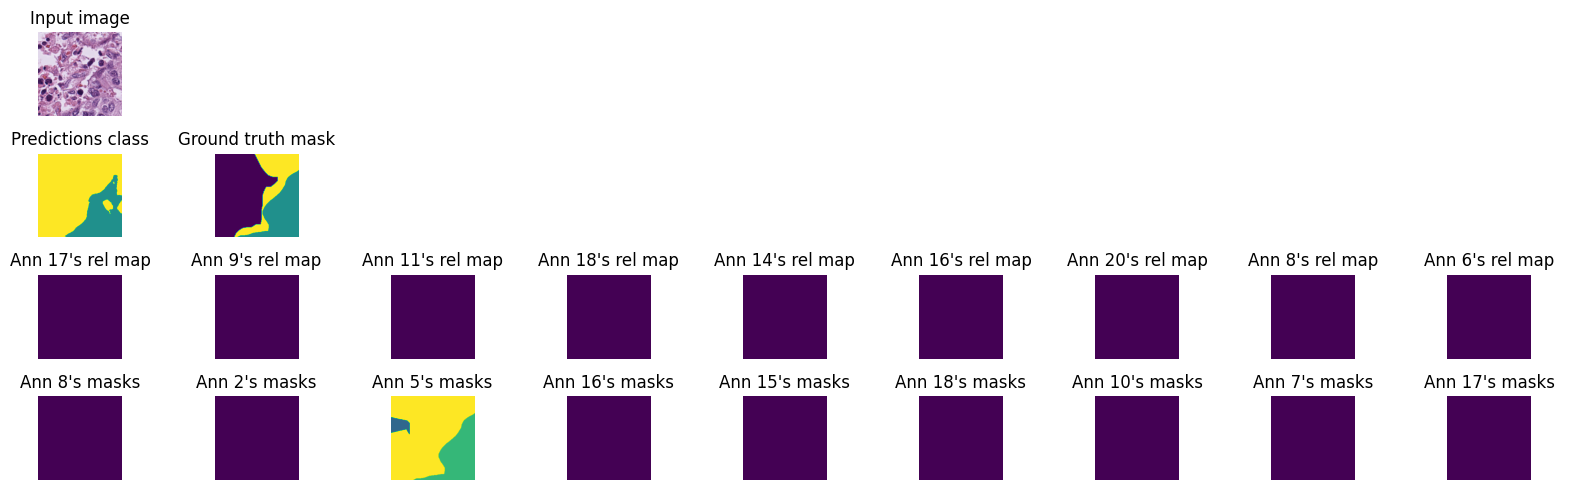

Train loss: 0.45039 | Time: 34m 43s | Val loss: 0.19509
Train_DICE_avg: 0.67008 | Train_Jaccard_avg: 0.58645 | Train_Sensitivity_avg: 0.71326 | Train_Specificity_avg: 0.84606 
Class 0 - Train_DICE: 0.54764 | Train_Jaccard: 0.53886 | Train_Sensitivity: 0.58127 | Train_Specificity: 0.99530 
Class 1 - Train_DICE: 0.77161 | Train_Jaccard: 0.65491 | Train_Sensitivity: 0.81131 | Train_Specificity: 0.77284 
Class 2 - Train_DICE: 0.69098 | Train_Jaccard: 0.56558 | Train_Sensitivity: 0.74720 | Train_Specificity: 0.77004 
Val_DICE_avg: 0.67199 | Val_Jaccard_avg: 0.59087 | Val_Sensitivity_avg: 0.71605 | Val_Specificity_avg: 0.84579 
Class 0 - Val_DICE: 0.53763 | Val_Jaccard: 0.52528 | Val_Sensitivity: 0.57350 | Val_Specificity: 0.99298 
Class 1 - Val_DICE: 0.80500 | Val_Jaccard: 0.69190 | Val_Sensitivity: 0.86630 | Val_Specificity: 0.73262 
Class 2 - Val_DICE: 0.67333 | Val_Jaccard: 0.55543 | Val_Sensitivity: 0.70836 | Val_Specificity: 0.81178 

Epoch 22/61


Validation Epoch 22/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.44714 | Time: 36m 19s | Val loss: 0.19032
Train_DICE_avg: 0.67269 | Train_Jaccard_avg: 0.58939 | Train_Sensitivity_avg: 0.71886 | Train_Specificity_avg: 0.84821 
Class 0 - Train_DICE: 0.54561 | Train_Jaccard: 0.53476 | Train_Sensitivity: 0.58885 | Train_Specificity: 0.99494 
Class 1 - Train_DICE: 0.77662 | Train_Jaccard: 0.66189 | Train_Sensitivity: 0.81608 | Train_Specificity: 0.77681 
Class 2 - Train_DICE: 0.69584 | Train_Jaccard: 0.57153 | Train_Sensitivity: 0.75165 | Train_Specificity: 0.77289 
Val_DICE_avg: 0.66965 | Val_Jaccard_avg: 0.58685 | Val_Sensitivity_avg: 0.71615 | Val_Specificity_avg: 0.84357 
Class 0 - Val_DICE: 0.53555 | Val_Jaccard: 0.52274 | Val_Sensitivity: 0.57729 | Val_Specificity: 0.99385 
Class 1 - Val_DICE: 0.80102 | Val_Jaccard: 0.68658 | Val_Sensitivity: 0.86881 | Val_Specificity: 0.72399 
Class 2 - Val_DICE: 0.67239 | Val_Jaccard: 0.55123 | Val_Sensitivity: 0.70233 | Val_Specificity: 0.81286 

Epoch 23/61


Validation Epoch 23/61: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


Train loss: 0.43576 | Time: 37m 55s | Val loss: 0.18600
Train_DICE_avg: 0.66623 | Train_Jaccard_avg: 0.58162 | Train_Sensitivity_avg: 0.72050 | Train_Specificity_avg: 0.84928 
Class 0 - Train_DICE: 0.53050 | Train_Jaccard: 0.51592 | Train_Sensitivity: 0.60238 | Train_Specificity: 0.99035 
Class 1 - Train_DICE: 0.77317 | Train_Jaccard: 0.65832 | Train_Sensitivity: 0.80827 | Train_Specificity: 0.78325 
Class 2 - Train_DICE: 0.69502 | Train_Jaccard: 0.57062 | Train_Sensitivity: 0.75086 | Train_Specificity: 0.77422 
Val_DICE_avg: 0.67335 | Val_Jaccard_avg: 0.59237 | Val_Sensitivity_avg: 0.72222 | Val_Specificity_avg: 0.84929 
Class 0 - Val_DICE: 0.52535 | Val_Jaccard: 0.51269 | Val_Sensitivity: 0.57740 | Val_Specificity: 0.99028 
Class 1 - Val_DICE: 0.79731 | Val_Jaccard: 0.68527 | Val_Sensitivity: 0.82195 | Val_Specificity: 0.79054 
Class 2 - Val_DICE: 0.69739 | Val_Jaccard: 0.57914 | Val_Sensitivity: 0.76732 | Val_Specificity: 0.76705 

Epoch 24/61


Validation Epoch 24/61: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


Train loss: 0.43384 | Time: 39m 29s | Val loss: 0.18301
Train_DICE_avg: 0.66606 | Train_Jaccard_avg: 0.58142 | Train_Sensitivity_avg: 0.72447 | Train_Specificity_avg: 0.85050 
Class 0 - Train_DICE: 0.52141 | Train_Jaccard: 0.50507 | Train_Sensitivity: 0.60783 | Train_Specificity: 0.98963 
Class 1 - Train_DICE: 0.77792 | Train_Jaccard: 0.66429 | Train_Sensitivity: 0.81078 | Train_Specificity: 0.78616 
Class 2 - Train_DICE: 0.69884 | Train_Jaccard: 0.57490 | Train_Sensitivity: 0.75479 | Train_Specificity: 0.77570 
Val_DICE_avg: 0.67144 | Val_Jaccard_avg: 0.59013 | Val_Sensitivity_avg: 0.72630 | Val_Specificity_avg: 0.84999 
Class 0 - Val_DICE: 0.52198 | Val_Jaccard: 0.50574 | Val_Sensitivity: 0.59714 | Val_Specificity: 0.98906 
Class 1 - Val_DICE: 0.80267 | Val_Jaccard: 0.69147 | Val_Sensitivity: 0.84176 | Val_Specificity: 0.76770 
Class 2 - Val_DICE: 0.68967 | Val_Jaccard: 0.57319 | Val_Sensitivity: 0.74000 | Val_Specificity: 0.79321 

Epoch 25/61


Validation Epoch 25/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.43637 | Time: 41m 7s | Val loss: 0.18128
Train_DICE_avg: 0.65236 | Train_Jaccard_avg: 0.56654 | Train_Sensitivity_avg: 0.72885 | Train_Specificity_avg: 0.85229 
Class 0 - Train_DICE: 0.47818 | Train_Jaccard: 0.45835 | Train_Sensitivity: 0.62407 | Train_Specificity: 0.98433 
Class 1 - Train_DICE: 0.77702 | Train_Jaccard: 0.66325 | Train_Sensitivity: 0.80421 | Train_Specificity: 0.79708 
Class 2 - Train_DICE: 0.70189 | Train_Jaccard: 0.57802 | Train_Sensitivity: 0.75827 | Train_Specificity: 0.77546 
Val_DICE_avg: 0.67788 | Val_Jaccard_avg: 0.59506 | Val_Sensitivity_avg: 0.73235 | Val_Specificity_avg: 0.85544 
Class 0 - Val_DICE: 0.52592 | Val_Jaccard: 0.50695 | Val_Sensitivity: 0.60527 | Val_Specificity: 0.98479 
Class 1 - Val_DICE: 0.80041 | Val_Jaccard: 0.68798 | Val_Sensitivity: 0.81005 | Val_Specificity: 0.81324 
Class 2 - Val_DICE: 0.70732 | Val_Jaccard: 0.59025 | Val_Sensitivity: 0.78173 | Val_Specificity: 0.76829 

Epoch 26/61


Validation Epoch 26/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


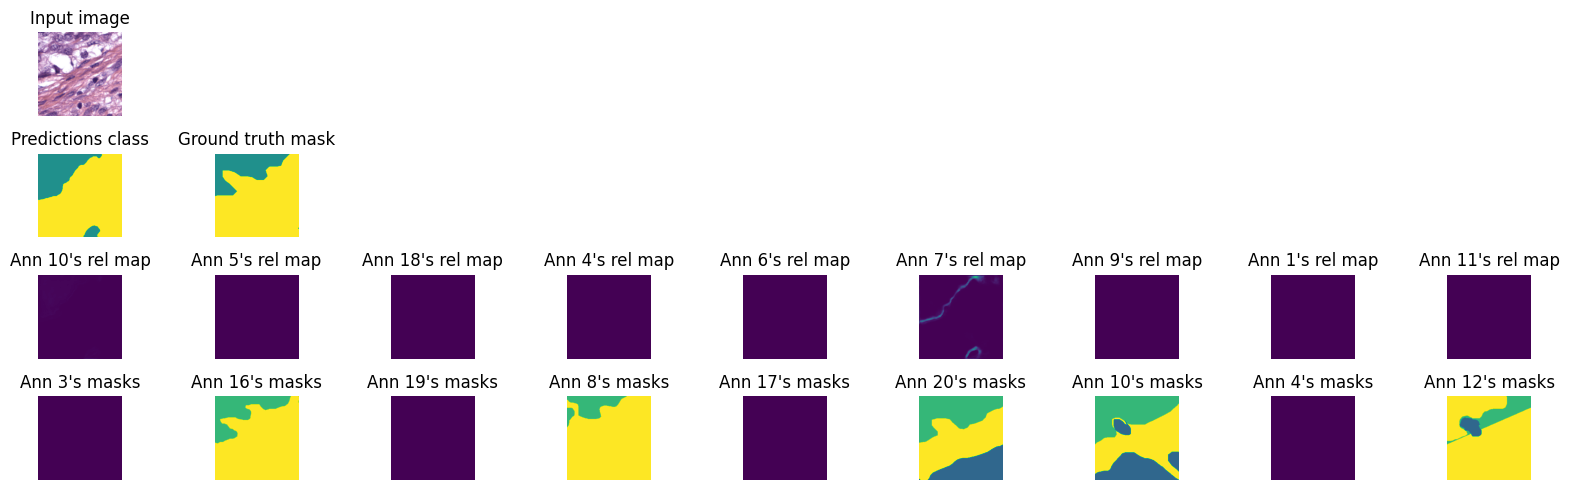

Train loss: 0.44026 | Time: 42m 43s | Val loss: 0.18166
Train_DICE_avg: 0.65493 | Train_Jaccard_avg: 0.56900 | Train_Sensitivity_avg: 0.72976 | Train_Specificity_avg: 0.85221 
Class 0 - Train_DICE: 0.48569 | Train_Jaccard: 0.46396 | Train_Sensitivity: 0.62731 | Train_Specificity: 0.98459 
Class 1 - Train_DICE: 0.78063 | Train_Jaccard: 0.66784 | Train_Sensitivity: 0.81835 | Train_Specificity: 0.78342 
Class 2 - Train_DICE: 0.69847 | Train_Jaccard: 0.57520 | Train_Sensitivity: 0.74361 | Train_Specificity: 0.78860 
Val_DICE_avg: 0.66181 | Val_Jaccard_avg: 0.57677 | Val_Sensitivity_avg: 0.72814 | Val_Specificity_avg: 0.84893 
Class 0 - Val_DICE: 0.50972 | Val_Jaccard: 0.48559 | Val_Sensitivity: 0.63416 | Val_Specificity: 0.97441 
Class 1 - Val_DICE: 0.80735 | Val_Jaccard: 0.69561 | Val_Sensitivity: 0.87440 | Val_Specificity: 0.73084 
Class 2 - Val_DICE: 0.66835 | Val_Jaccard: 0.54912 | Val_Sensitivity: 0.67587 | Val_Specificity: 0.84154 

Epoch 27/61


Validation Epoch 27/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.43249 | Time: 44m 18s | Val loss: 0.18128
Train_DICE_avg: 0.64536 | Train_Jaccard_avg: 0.55917 | Train_Sensitivity_avg: 0.73279 | Train_Specificity_avg: 0.85425 
Class 0 - Train_DICE: 0.44647 | Train_Jaccard: 0.42361 | Train_Sensitivity: 0.63219 | Train_Specificity: 0.98125 
Class 1 - Train_DICE: 0.78346 | Train_Jaccard: 0.67081 | Train_Sensitivity: 0.80738 | Train_Specificity: 0.80049 
Class 2 - Train_DICE: 0.70613 | Train_Jaccard: 0.58310 | Train_Sensitivity: 0.75880 | Train_Specificity: 0.78101 
Val_DICE_avg: 0.67209 | Val_Jaccard_avg: 0.58958 | Val_Sensitivity_avg: 0.72917 | Val_Specificity_avg: 0.85165 
Class 0 - Val_DICE: 0.51859 | Val_Jaccard: 0.50132 | Val_Sensitivity: 0.60223 | Val_Specificity: 0.98480 
Class 1 - Val_DICE: 0.79805 | Val_Jaccard: 0.68561 | Val_Sensitivity: 0.81643 | Val_Specificity: 0.79693 
Class 2 - Val_DICE: 0.69964 | Val_Jaccard: 0.58183 | Val_Sensitivity: 0.76884 | Val_Specificity: 0.77321 

Epoch 28/61


Validation Epoch 28/61: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


Train loss: 0.43771 | Time: 45m 52s | Val loss: 0.17916
Train_DICE_avg: 0.64311 | Train_Jaccard_avg: 0.55656 | Train_Sensitivity_avg: 0.73614 | Train_Specificity_avg: 0.85435 
Class 0 - Train_DICE: 0.44541 | Train_Jaccard: 0.42104 | Train_Sensitivity: 0.64394 | Train_Specificity: 0.98041 
Class 1 - Train_DICE: 0.78112 | Train_Jaccard: 0.66903 | Train_Sensitivity: 0.81132 | Train_Specificity: 0.79743 
Class 2 - Train_DICE: 0.70280 | Train_Jaccard: 0.57960 | Train_Sensitivity: 0.75317 | Train_Specificity: 0.78522 
Val_DICE_avg: 0.66427 | Val_Jaccard_avg: 0.58035 | Val_Sensitivity_avg: 0.73207 | Val_Specificity_avg: 0.85143 
Class 0 - Val_DICE: 0.50142 | Val_Jaccard: 0.47872 | Val_Sensitivity: 0.62119 | Val_Specificity: 0.97966 
Class 1 - Val_DICE: 0.81149 | Val_Jaccard: 0.70154 | Val_Sensitivity: 0.87034 | Val_Specificity: 0.74631 
Class 2 - Val_DICE: 0.67989 | Val_Jaccard: 0.56079 | Val_Sensitivity: 0.70467 | Val_Specificity: 0.82833 

Epoch 29/61


Validation Epoch 29/61: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]


Train loss: 0.44080 | Time: 47m 29s | Val loss: 0.17883
Train_DICE_avg: 0.64803 | Train_Jaccard_avg: 0.56156 | Train_Sensitivity_avg: 0.73659 | Train_Specificity_avg: 0.85303 
Class 0 - Train_DICE: 0.46104 | Train_Jaccard: 0.43764 | Train_Sensitivity: 0.64641 | Train_Specificity: 0.98041 
Class 1 - Train_DICE: 0.78298 | Train_Jaccard: 0.67077 | Train_Sensitivity: 0.81986 | Train_Specificity: 0.78611 
Class 2 - Train_DICE: 0.70008 | Train_Jaccard: 0.57628 | Train_Sensitivity: 0.74352 | Train_Specificity: 0.79257 
Val_DICE_avg: 0.66838 | Val_Jaccard_avg: 0.58429 | Val_Sensitivity_avg: 0.73503 | Val_Specificity_avg: 0.85457 
Class 0 - Val_DICE: 0.50047 | Val_Jaccard: 0.47718 | Val_Sensitivity: 0.62623 | Val_Specificity: 0.97639 
Class 1 - Val_DICE: 0.80701 | Val_Jaccard: 0.69583 | Val_Sensitivity: 0.83267 | Val_Specificity: 0.78977 
Class 2 - Val_DICE: 0.69767 | Val_Jaccard: 0.57985 | Val_Sensitivity: 0.74621 | Val_Specificity: 0.79754 

Epoch 30/61


Validation Epoch 30/61: 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


Train loss: 0.43741 | Time: 49m 4s | Val loss: 0.17956
Train_DICE_avg: 0.63395 | Train_Jaccard_avg: 0.54747 | Train_Sensitivity_avg: 0.73612 | Train_Specificity_avg: 0.85412 
Class 0 - Train_DICE: 0.41691 | Train_Jaccard: 0.39254 | Train_Sensitivity: 0.64294 | Train_Specificity: 0.98000 
Class 1 - Train_DICE: 0.78164 | Train_Jaccard: 0.66961 | Train_Sensitivity: 0.81233 | Train_Specificity: 0.79600 
Class 2 - Train_DICE: 0.70329 | Train_Jaccard: 0.58025 | Train_Sensitivity: 0.75308 | Train_Specificity: 0.78635 
Val_DICE_avg: 0.66594 | Val_Jaccard_avg: 0.58018 | Val_Sensitivity_avg: 0.73774 | Val_Specificity_avg: 0.85452 
Class 0 - Val_DICE: 0.49712 | Val_Jaccard: 0.47118 | Val_Sensitivity: 0.63853 | Val_Specificity: 0.97429 
Class 1 - Val_DICE: 0.80345 | Val_Jaccard: 0.69239 | Val_Sensitivity: 0.83163 | Val_Specificity: 0.78909 
Class 2 - Val_DICE: 0.69726 | Val_Jaccard: 0.57696 | Val_Sensitivity: 0.74307 | Val_Specificity: 0.80017 

Epoch 31/61
Training phase 4


Validation Epoch 31/61: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]


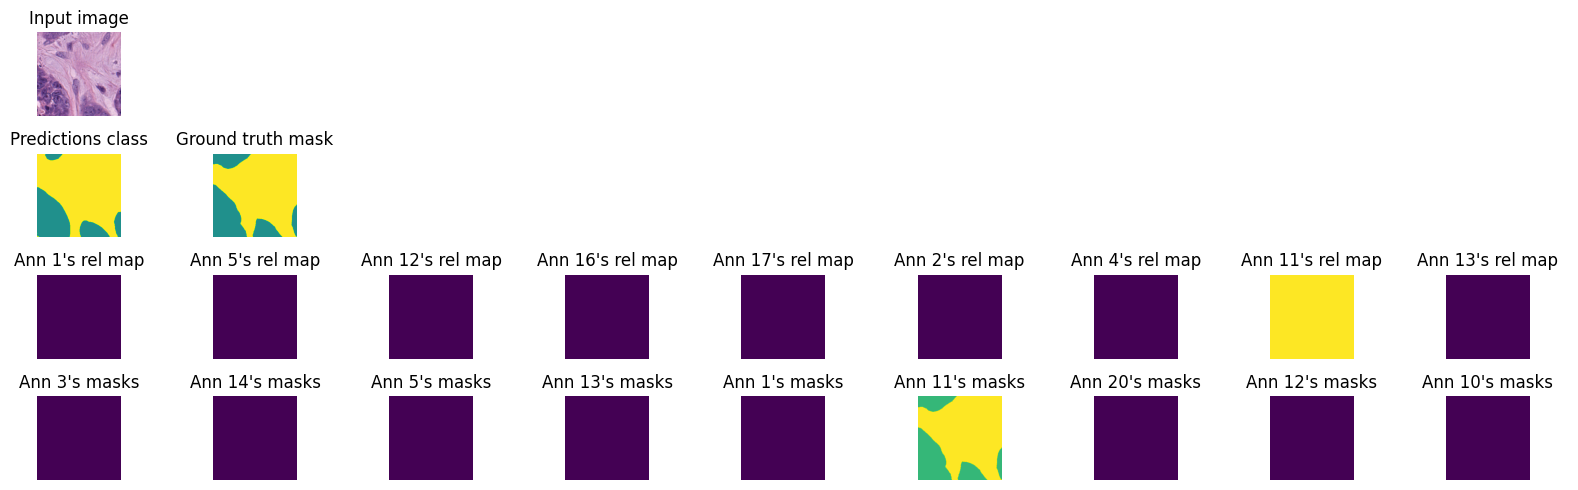

Train loss: 0.43861 | Time: 50m 41s | Val loss: 0.17537
Train_DICE_avg: 0.62452 | Train_Jaccard_avg: 0.53810 | Train_Sensitivity_avg: 0.73856 | Train_Specificity_avg: 0.85520 
Class 0 - Train_DICE: 0.38637 | Train_Jaccard: 0.36118 | Train_Sensitivity: 0.64974 | Train_Specificity: 0.97755 
Class 1 - Train_DICE: 0.78501 | Train_Jaccard: 0.67369 | Train_Sensitivity: 0.81910 | Train_Specificity: 0.79394 
Class 2 - Train_DICE: 0.70218 | Train_Jaccard: 0.57943 | Train_Sensitivity: 0.74684 | Train_Specificity: 0.79411 
Val_DICE_avg: 0.67633 | Val_Jaccard_avg: 0.59412 | Val_Sensitivity_avg: 0.73867 | Val_Specificity_avg: 0.85875 
Class 0 - Val_DICE: 0.50952 | Val_Jaccard: 0.48704 | Val_Sensitivity: 0.62161 | Val_Specificity: 0.97644 
Class 1 - Val_DICE: 0.81325 | Val_Jaccard: 0.70502 | Val_Sensitivity: 0.84658 | Val_Specificity: 0.79025 
Class 2 - Val_DICE: 0.70621 | Val_Jaccard: 0.59029 | Val_Sensitivity: 0.74781 | Val_Specificity: 0.80955 

Epoch 32/61


Validation Epoch 32/61: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


Train loss: 0.43471 | Time: 52m 15s | Val loss: 0.17516
Train_DICE_avg: 0.63378 | Train_Jaccard_avg: 0.54819 | Train_Sensitivity_avg: 0.74008 | Train_Specificity_avg: 0.85579 
Class 0 - Train_DICE: 0.40910 | Train_Jaccard: 0.38414 | Train_Sensitivity: 0.65343 | Train_Specificity: 0.97557 
Class 1 - Train_DICE: 0.78902 | Train_Jaccard: 0.67859 | Train_Sensitivity: 0.82095 | Train_Specificity: 0.79498 
Class 2 - Train_DICE: 0.70324 | Train_Jaccard: 0.58182 | Train_Sensitivity: 0.74585 | Train_Specificity: 0.79681 
Val_DICE_avg: 0.67868 | Val_Jaccard_avg: 0.59658 | Val_Sensitivity_avg: 0.73948 | Val_Specificity_avg: 0.85803 
Class 0 - Val_DICE: 0.51340 | Val_Jaccard: 0.49173 | Val_Sensitivity: 0.61570 | Val_Specificity: 0.98411 
Class 1 - Val_DICE: 0.81793 | Val_Jaccard: 0.71057 | Val_Sensitivity: 0.86225 | Val_Specificity: 0.77367 
Class 2 - Val_DICE: 0.70471 | Val_Jaccard: 0.58745 | Val_Sensitivity: 0.74048 | Val_Specificity: 0.81632 

Epoch 33/61


Validation Epoch 33/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Train loss: 0.43230 | Time: 53m 50s | Val loss: 0.17467
Train_DICE_avg: 0.62369 | Train_Jaccard_avg: 0.53817 | Train_Sensitivity_avg: 0.74093 | Train_Specificity_avg: 0.85590 
Class 0 - Train_DICE: 0.37409 | Train_Jaccard: 0.34879 | Train_Sensitivity: 0.65245 | Train_Specificity: 0.97298 
Class 1 - Train_DICE: 0.79132 | Train_Jaccard: 0.68179 | Train_Sensitivity: 0.82477 | Train_Specificity: 0.79450 
Class 2 - Train_DICE: 0.70565 | Train_Jaccard: 0.58392 | Train_Sensitivity: 0.74556 | Train_Specificity: 0.80023 
Val_DICE_avg: 0.68456 | Val_Jaccard_avg: 0.60258 | Val_Sensitivity_avg: 0.73918 | Val_Specificity_avg: 0.85787 
Class 0 - Val_DICE: 0.53215 | Val_Jaccard: 0.50951 | Val_Sensitivity: 0.62148 | Val_Specificity: 0.97746 
Class 1 - Val_DICE: 0.81914 | Val_Jaccard: 0.71089 | Val_Sensitivity: 0.84865 | Val_Specificity: 0.78846 
Class 2 - Val_DICE: 0.70238 | Val_Jaccard: 0.58732 | Val_Sensitivity: 0.74742 | Val_Specificity: 0.80769 

Epoch 34/61


Validation Epoch 34/61: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


Train loss: 0.42660 | Time: 55m 26s | Val loss: 0.17411
Train_DICE_avg: 0.62336 | Train_Jaccard_avg: 0.53796 | Train_Sensitivity_avg: 0.74129 | Train_Specificity_avg: 0.85599 
Class 0 - Train_DICE: 0.37499 | Train_Jaccard: 0.34967 | Train_Sensitivity: 0.65171 | Train_Specificity: 0.97509 
Class 1 - Train_DICE: 0.78878 | Train_Jaccard: 0.67982 | Train_Sensitivity: 0.82122 | Train_Specificity: 0.79816 
Class 2 - Train_DICE: 0.70630 | Train_Jaccard: 0.58439 | Train_Sensitivity: 0.75094 | Train_Specificity: 0.79472 
Val_DICE_avg: 0.66685 | Val_Jaccard_avg: 0.58555 | Val_Sensitivity_avg: 0.73638 | Val_Specificity_avg: 0.85685 
Class 0 - Val_DICE: 0.49048 | Val_Jaccard: 0.46783 | Val_Sensitivity: 0.62789 | Val_Specificity: 0.97011 
Class 1 - Val_DICE: 0.81194 | Val_Jaccard: 0.70456 | Val_Sensitivity: 0.83355 | Val_Specificity: 0.79846 
Class 2 - Val_DICE: 0.69814 | Val_Jaccard: 0.58426 | Val_Sensitivity: 0.74770 | Val_Specificity: 0.80197 

Epoch 35/61


Validation Epoch 35/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.43335 | Time: 57m 1s | Val loss: 0.17308
Train_DICE_avg: 0.62148 | Train_Jaccard_avg: 0.53672 | Train_Sensitivity_avg: 0.74241 | Train_Specificity_avg: 0.85578 
Class 0 - Train_DICE: 0.36793 | Train_Jaccard: 0.34283 | Train_Sensitivity: 0.65352 | Train_Specificity: 0.97410 
Class 1 - Train_DICE: 0.79243 | Train_Jaccard: 0.68353 | Train_Sensitivity: 0.82416 | Train_Specificity: 0.79815 
Class 2 - Train_DICE: 0.70409 | Train_Jaccard: 0.58379 | Train_Sensitivity: 0.74956 | Train_Specificity: 0.79509 
Val_DICE_avg: 0.68214 | Val_Jaccard_avg: 0.60036 | Val_Sensitivity_avg: 0.74029 | Val_Specificity_avg: 0.85883 
Class 0 - Val_DICE: 0.52745 | Val_Jaccard: 0.50382 | Val_Sensitivity: 0.63120 | Val_Specificity: 0.97249 
Class 1 - Val_DICE: 0.81917 | Val_Jaccard: 0.71203 | Val_Sensitivity: 0.84869 | Val_Specificity: 0.79035 
Class 2 - Val_DICE: 0.69981 | Val_Jaccard: 0.58524 | Val_Sensitivity: 0.74097 | Val_Specificity: 0.81367 

Epoch 36/61


Validation Epoch 36/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


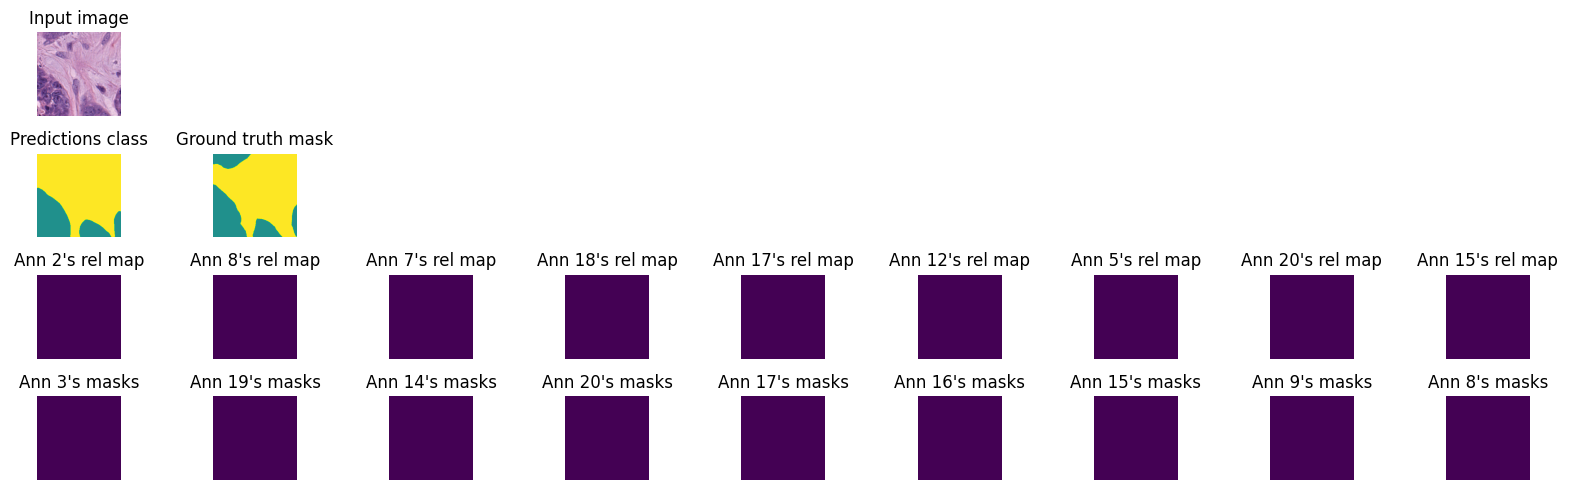

Train loss: 0.42858 | Time: 58m 41s | Val loss: 0.17533
Train_DICE_avg: 0.64285 | Train_Jaccard_avg: 0.55824 | Train_Sensitivity_avg: 0.74447 | Train_Specificity_avg: 0.85778 
Class 0 - Train_DICE: 0.42921 | Train_Jaccard: 0.40338 | Train_Sensitivity: 0.66294 | Train_Specificity: 0.96914 
Class 1 - Train_DICE: 0.79321 | Train_Jaccard: 0.68495 | Train_Sensitivity: 0.82486 | Train_Specificity: 0.80040 
Class 2 - Train_DICE: 0.70614 | Train_Jaccard: 0.58638 | Train_Sensitivity: 0.74561 | Train_Specificity: 0.80379 
Val_DICE_avg: 0.68091 | Val_Jaccard_avg: 0.60110 | Val_Sensitivity_avg: 0.73481 | Val_Specificity_avg: 0.85671 
Class 0 - Val_DICE: 0.52448 | Val_Jaccard: 0.50670 | Val_Sensitivity: 0.60592 | Val_Specificity: 0.97978 
Class 1 - Val_DICE: 0.81467 | Val_Jaccard: 0.70667 | Val_Sensitivity: 0.83842 | Val_Specificity: 0.79663 
Class 2 - Val_DICE: 0.70357 | Val_Jaccard: 0.58993 | Val_Sensitivity: 0.76008 | Val_Specificity: 0.79373 

Epoch 37/61


Validation Epoch 37/61: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


Train loss: 0.42867 | Time: 60m 16s | Val loss: 0.17373
Train_DICE_avg: 0.62154 | Train_Jaccard_avg: 0.53718 | Train_Sensitivity_avg: 0.74680 | Train_Specificity_avg: 0.85759 
Class 0 - Train_DICE: 0.36170 | Train_Jaccard: 0.33568 | Train_Sensitivity: 0.66266 | Train_Specificity: 0.97359 
Class 1 - Train_DICE: 0.79197 | Train_Jaccard: 0.68538 | Train_Sensitivity: 0.82399 | Train_Specificity: 0.80089 
Class 2 - Train_DICE: 0.71095 | Train_Jaccard: 0.59047 | Train_Sensitivity: 0.75376 | Train_Specificity: 0.79831 
Val_DICE_avg: 0.66687 | Val_Jaccard_avg: 0.58493 | Val_Sensitivity_avg: 0.73805 | Val_Specificity_avg: 0.85757 
Class 0 - Val_DICE: 0.49055 | Val_Jaccard: 0.46696 | Val_Sensitivity: 0.63698 | Val_Specificity: 0.96797 
Class 1 - Val_DICE: 0.81137 | Val_Jaccard: 0.70331 | Val_Sensitivity: 0.82786 | Val_Specificity: 0.80625 
Class 2 - Val_DICE: 0.69869 | Val_Jaccard: 0.58451 | Val_Sensitivity: 0.74931 | Val_Specificity: 0.79849 

Epoch 38/61


Validation Epoch 38/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Train loss: 0.42446 | Time: 61m 52s | Val loss: 0.17394
Train_DICE_avg: 0.61972 | Train_Jaccard_avg: 0.53580 | Train_Sensitivity_avg: 0.74422 | Train_Specificity_avg: 0.85669 
Class 0 - Train_DICE: 0.36145 | Train_Jaccard: 0.33623 | Train_Sensitivity: 0.65964 | Train_Specificity: 0.97083 
Class 1 - Train_DICE: 0.79202 | Train_Jaccard: 0.68480 | Train_Sensitivity: 0.82319 | Train_Specificity: 0.79966 
Class 2 - Train_DICE: 0.70571 | Train_Jaccard: 0.58636 | Train_Sensitivity: 0.74984 | Train_Specificity: 0.79958 
Val_DICE_avg: 0.67367 | Val_Jaccard_avg: 0.59333 | Val_Sensitivity_avg: 0.73086 | Val_Specificity_avg: 0.85217 
Class 0 - Val_DICE: 0.52383 | Val_Jaccard: 0.50586 | Val_Sensitivity: 0.61068 | Val_Specificity: 0.97856 
Class 1 - Val_DICE: 0.81298 | Val_Jaccard: 0.70478 | Val_Sensitivity: 0.85983 | Val_Specificity: 0.76301 
Class 2 - Val_DICE: 0.68421 | Val_Jaccard: 0.56934 | Val_Sensitivity: 0.72206 | Val_Specificity: 0.81495 

Epoch 39/61


Validation Epoch 39/61: 100%|██████████| 8/8 [00:08<00:00,  1.12s/it]


Train loss: 0.42975 | Time: 63m 26s | Val loss: 0.17332
Train_DICE_avg: 0.62835 | Train_Jaccard_avg: 0.54409 | Train_Sensitivity_avg: 0.74752 | Train_Specificity_avg: 0.85856 
Class 0 - Train_DICE: 0.37670 | Train_Jaccard: 0.35129 | Train_Sensitivity: 0.66207 | Train_Specificity: 0.97021 
Class 1 - Train_DICE: 0.79702 | Train_Jaccard: 0.68911 | Train_Sensitivity: 0.82827 | Train_Specificity: 0.80106 
Class 2 - Train_DICE: 0.71132 | Train_Jaccard: 0.59187 | Train_Sensitivity: 0.75223 | Train_Specificity: 0.80441 
Val_DICE_avg: 0.67023 | Val_Jaccard_avg: 0.58684 | Val_Sensitivity_avg: 0.73792 | Val_Specificity_avg: 0.85698 
Class 0 - Val_DICE: 0.50593 | Val_Jaccard: 0.47994 | Val_Sensitivity: 0.63810 | Val_Specificity: 0.96734 
Class 1 - Val_DICE: 0.81219 | Val_Jaccard: 0.70485 | Val_Sensitivity: 0.84818 | Val_Specificity: 0.78420 
Class 2 - Val_DICE: 0.69256 | Val_Jaccard: 0.57573 | Val_Sensitivity: 0.72749 | Val_Specificity: 0.81941 

Epoch 40/61


Validation Epoch 40/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Train loss: 0.42244 | Time: 65m 2s | Val loss: 0.17207
Train_DICE_avg: 0.62152 | Train_Jaccard_avg: 0.53737 | Train_Sensitivity_avg: 0.74797 | Train_Specificity_avg: 0.85837 
Class 0 - Train_DICE: 0.35751 | Train_Jaccard: 0.33208 | Train_Sensitivity: 0.66322 | Train_Specificity: 0.97028 
Class 1 - Train_DICE: 0.79422 | Train_Jaccard: 0.68768 | Train_Sensitivity: 0.82558 | Train_Specificity: 0.80406 
Class 2 - Train_DICE: 0.71282 | Train_Jaccard: 0.59236 | Train_Sensitivity: 0.75510 | Train_Specificity: 0.80076 
Val_DICE_avg: 0.67136 | Val_Jaccard_avg: 0.58915 | Val_Sensitivity_avg: 0.73950 | Val_Specificity_avg: 0.85814 
Class 0 - Val_DICE: 0.50771 | Val_Jaccard: 0.48224 | Val_Sensitivity: 0.64348 | Val_Specificity: 0.96495 
Class 1 - Val_DICE: 0.81464 | Val_Jaccard: 0.70796 | Val_Sensitivity: 0.84303 | Val_Specificity: 0.79405 
Class 2 - Val_DICE: 0.69173 | Val_Jaccard: 0.57724 | Val_Sensitivity: 0.73200 | Val_Specificity: 0.81541 

Epoch 41/61


Validation Epoch 41/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


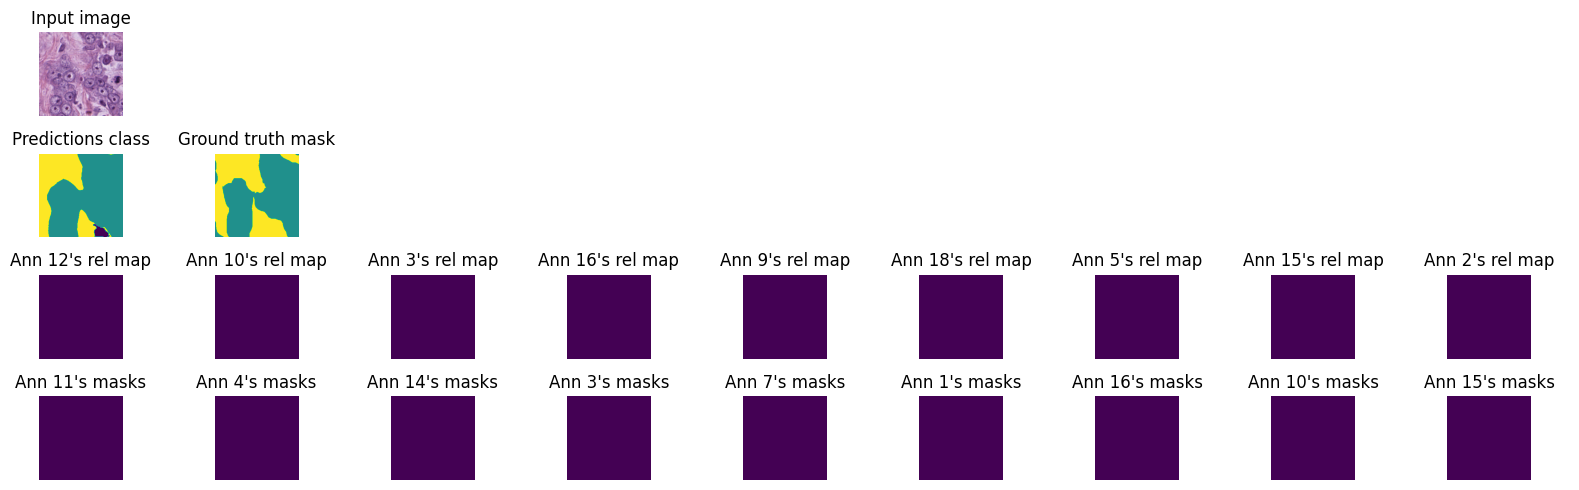

Train loss: 0.43508 | Time: 66m 40s | Val loss: 0.17046
Train_DICE_avg: 0.62830 | Train_Jaccard_avg: 0.54387 | Train_Sensitivity_avg: 0.74672 | Train_Specificity_avg: 0.85873 
Class 0 - Train_DICE: 0.37618 | Train_Jaccard: 0.35038 | Train_Sensitivity: 0.66105 | Train_Specificity: 0.96736 
Class 1 - Train_DICE: 0.79741 | Train_Jaccard: 0.69079 | Train_Sensitivity: 0.83045 | Train_Specificity: 0.80192 
Class 2 - Train_DICE: 0.71132 | Train_Jaccard: 0.59043 | Train_Sensitivity: 0.74865 | Train_Specificity: 0.80692 
Val_DICE_avg: 0.67635 | Val_Jaccard_avg: 0.59528 | Val_Sensitivity_avg: 0.73929 | Val_Specificity_avg: 0.85838 
Class 0 - Val_DICE: 0.51427 | Val_Jaccard: 0.49179 | Val_Sensitivity: 0.63252 | Val_Specificity: 0.97227 
Class 1 - Val_DICE: 0.81910 | Val_Jaccard: 0.71313 | Val_Sensitivity: 0.86320 | Val_Specificity: 0.77423 
Class 2 - Val_DICE: 0.69566 | Val_Jaccard: 0.58092 | Val_Sensitivity: 0.72213 | Val_Specificity: 0.82863 

Epoch 42/61


Validation Epoch 42/61: 100%|██████████| 8/8 [00:09<00:00,  1.13s/it]


Train loss: 0.42696 | Time: 68m 16s | Val loss: 0.17108
Train_DICE_avg: 0.63347 | Train_Jaccard_avg: 0.55017 | Train_Sensitivity_avg: 0.74857 | Train_Specificity_avg: 0.86098 
Class 0 - Train_DICE: 0.38627 | Train_Jaccard: 0.35969 | Train_Sensitivity: 0.66432 | Train_Specificity: 0.96727 
Class 1 - Train_DICE: 0.79928 | Train_Jaccard: 0.69388 | Train_Sensitivity: 0.82805 | Train_Specificity: 0.80760 
Class 2 - Train_DICE: 0.71485 | Train_Jaccard: 0.59695 | Train_Sensitivity: 0.75333 | Train_Specificity: 0.80805 
Val_DICE_avg: 0.67614 | Val_Jaccard_avg: 0.59792 | Val_Sensitivity_avg: 0.73517 | Val_Specificity_avg: 0.85785 
Class 0 - Val_DICE: 0.51246 | Val_Jaccard: 0.49531 | Val_Sensitivity: 0.61357 | Val_Specificity: 0.97310 
Class 1 - Val_DICE: 0.81823 | Val_Jaccard: 0.71358 | Val_Sensitivity: 0.85125 | Val_Specificity: 0.78817 
Class 2 - Val_DICE: 0.69774 | Val_Jaccard: 0.58485 | Val_Sensitivity: 0.74069 | Val_Specificity: 0.81228 

Epoch 43/61


Validation Epoch 43/61: 100%|██████████| 8/8 [00:09<00:00,  1.15s/it]


Train loss: 0.42814 | Time: 69m 55s | Val loss: 0.17088
Train_DICE_avg: 0.62870 | Train_Jaccard_avg: 0.54589 | Train_Sensitivity_avg: 0.74904 | Train_Specificity_avg: 0.86085 
Class 0 - Train_DICE: 0.36968 | Train_Jaccard: 0.34492 | Train_Sensitivity: 0.65864 | Train_Specificity: 0.97026 
Class 1 - Train_DICE: 0.80162 | Train_Jaccard: 0.69678 | Train_Sensitivity: 0.83244 | Train_Specificity: 0.80679 
Class 2 - Train_DICE: 0.71480 | Train_Jaccard: 0.59596 | Train_Sensitivity: 0.75605 | Train_Specificity: 0.80551 
Val_DICE_avg: 0.68009 | Val_Jaccard_avg: 0.59963 | Val_Sensitivity_avg: 0.74074 | Val_Specificity_avg: 0.85861 
Class 0 - Val_DICE: 0.52408 | Val_Jaccard: 0.50080 | Val_Sensitivity: 0.63266 | Val_Specificity: 0.97231 
Class 1 - Val_DICE: 0.82013 | Val_Jaccard: 0.71570 | Val_Sensitivity: 0.86154 | Val_Specificity: 0.77812 
Class 2 - Val_DICE: 0.69607 | Val_Jaccard: 0.58238 | Val_Sensitivity: 0.72802 | Val_Specificity: 0.82539 

Epoch 44/61


Validation Epoch 44/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Train loss: 0.42993 | Time: 71m 32s | Val loss: 0.17098
Train_DICE_avg: 0.64035 | Train_Jaccard_avg: 0.55737 | Train_Sensitivity_avg: 0.75026 | Train_Specificity_avg: 0.86045 
Class 0 - Train_DICE: 0.40858 | Train_Jaccard: 0.38231 | Train_Sensitivity: 0.66913 | Train_Specificity: 0.96860 
Class 1 - Train_DICE: 0.80259 | Train_Jaccard: 0.69786 | Train_Sensitivity: 0.83434 | Train_Specificity: 0.80332 
Class 2 - Train_DICE: 0.70988 | Train_Jaccard: 0.59193 | Train_Sensitivity: 0.74730 | Train_Specificity: 0.80944 
Val_DICE_avg: 0.68115 | Val_Jaccard_avg: 0.60134 | Val_Sensitivity_avg: 0.73751 | Val_Specificity_avg: 0.85722 
Class 0 - Val_DICE: 0.52909 | Val_Jaccard: 0.50889 | Val_Sensitivity: 0.62038 | Val_Specificity: 0.97604 
Class 1 - Val_DICE: 0.82163 | Val_Jaccard: 0.71641 | Val_Sensitivity: 0.87806 | Val_Specificity: 0.75841 
Class 2 - Val_DICE: 0.69273 | Val_Jaccard: 0.57873 | Val_Sensitivity: 0.71408 | Val_Specificity: 0.83722 

Epoch 45/61


Validation Epoch 45/61: 100%|██████████| 8/8 [00:08<00:00,  1.10s/it]


Train loss: 0.42250 | Time: 73m 9s | Val loss: 0.17163
Train_DICE_avg: 0.63494 | Train_Jaccard_avg: 0.55224 | Train_Sensitivity_avg: 0.75125 | Train_Specificity_avg: 0.86129 
Class 0 - Train_DICE: 0.38970 | Train_Jaccard: 0.36397 | Train_Sensitivity: 0.66827 | Train_Specificity: 0.96893 
Class 1 - Train_DICE: 0.80214 | Train_Jaccard: 0.69741 | Train_Sensitivity: 0.83099 | Train_Specificity: 0.80895 
Class 2 - Train_DICE: 0.71297 | Train_Jaccard: 0.59535 | Train_Sensitivity: 0.75448 | Train_Specificity: 0.80600 
Val_DICE_avg: 0.67357 | Val_Jaccard_avg: 0.59254 | Val_Sensitivity_avg: 0.73916 | Val_Specificity_avg: 0.85926 
Class 0 - Val_DICE: 0.51045 | Val_Jaccard: 0.48624 | Val_Sensitivity: 0.64073 | Val_Specificity: 0.96381 
Class 1 - Val_DICE: 0.81427 | Val_Jaccard: 0.70880 | Val_Sensitivity: 0.83279 | Val_Specificity: 0.80926 
Class 2 - Val_DICE: 0.69599 | Val_Jaccard: 0.58258 | Val_Sensitivity: 0.74397 | Val_Specificity: 0.80471 

Epoch 46/61


Validation Epoch 46/61: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


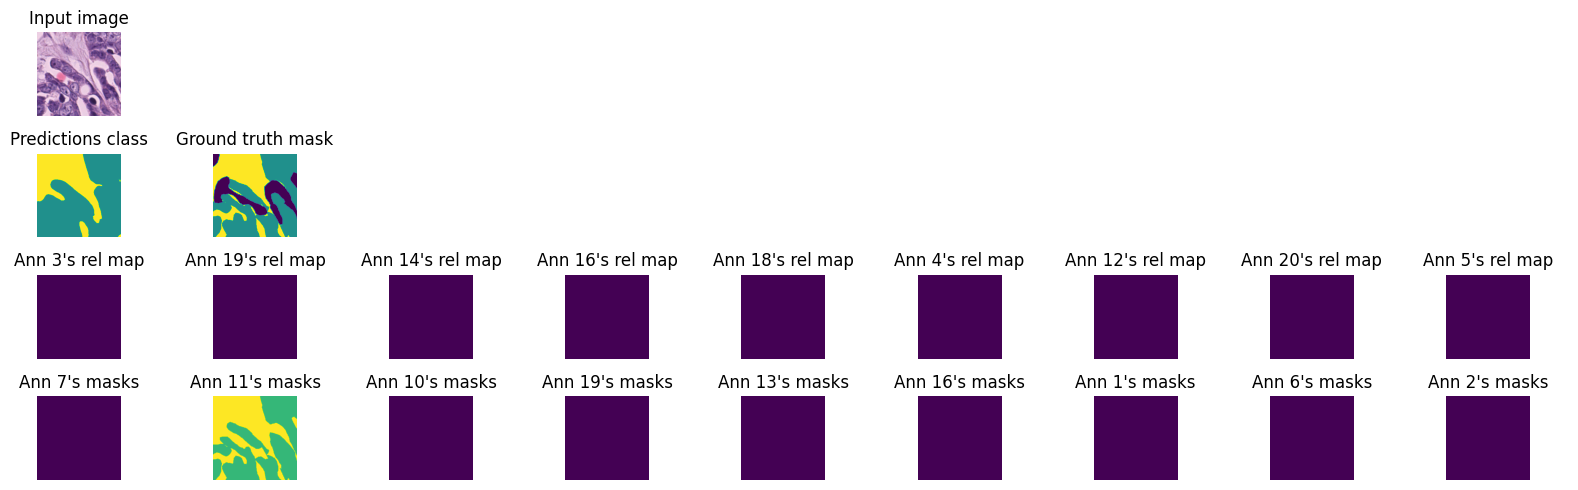

Train loss: 0.43106 | Time: 74m 48s | Val loss: 0.17068
Train_DICE_avg: 0.63876 | Train_Jaccard_avg: 0.55504 | Train_Sensitivity_avg: 0.75162 | Train_Specificity_avg: 0.86059 
Class 0 - Train_DICE: 0.40293 | Train_Jaccard: 0.37520 | Train_Sensitivity: 0.67389 | Train_Specificity: 0.96829 
Class 1 - Train_DICE: 0.80228 | Train_Jaccard: 0.69762 | Train_Sensitivity: 0.83575 | Train_Specificity: 0.80125 
Class 2 - Train_DICE: 0.71108 | Train_Jaccard: 0.59230 | Train_Sensitivity: 0.74521 | Train_Specificity: 0.81224 
Val_DICE_avg: 0.67926 | Val_Jaccard_avg: 0.59909 | Val_Sensitivity_avg: 0.73790 | Val_Specificity_avg: 0.85687 
Class 0 - Val_DICE: 0.52658 | Val_Jaccard: 0.50440 | Val_Sensitivity: 0.62547 | Val_Specificity: 0.97310 
Class 1 - Val_DICE: 0.82367 | Val_Jaccard: 0.71879 | Val_Sensitivity: 0.87768 | Val_Specificity: 0.75993 
Class 2 - Val_DICE: 0.68754 | Val_Jaccard: 0.57409 | Val_Sensitivity: 0.71055 | Val_Specificity: 0.83758 

Epoch 47/61


Validation Epoch 47/61: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


Train loss: 0.43150 | Time: 76m 25s | Val loss: 0.17125
Train_DICE_avg: 0.62654 | Train_Jaccard_avg: 0.54343 | Train_Sensitivity_avg: 0.75308 | Train_Specificity_avg: 0.86184 
Class 0 - Train_DICE: 0.36204 | Train_Jaccard: 0.33452 | Train_Sensitivity: 0.67523 | Train_Specificity: 0.96687 
Class 1 - Train_DICE: 0.80488 | Train_Jaccard: 0.70105 | Train_Sensitivity: 0.83555 | Train_Specificity: 0.80722 
Class 2 - Train_DICE: 0.71272 | Train_Jaccard: 0.59473 | Train_Sensitivity: 0.74845 | Train_Specificity: 0.81143 
Val_DICE_avg: 0.67698 | Val_Jaccard_avg: 0.59678 | Val_Sensitivity_avg: 0.73719 | Val_Specificity_avg: 0.85730 
Class 0 - Val_DICE: 0.51553 | Val_Jaccard: 0.49384 | Val_Sensitivity: 0.62509 | Val_Specificity: 0.97115 
Class 1 - Val_DICE: 0.81773 | Val_Jaccard: 0.71283 | Val_Sensitivity: 0.85142 | Val_Specificity: 0.78745 
Class 2 - Val_DICE: 0.69768 | Val_Jaccard: 0.58368 | Val_Sensitivity: 0.73506 | Val_Specificity: 0.81330 

Epoch 48/61


Validation Epoch 48/61: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


Train loss: 0.42509 | Time: 78m 0s | Val loss: 0.17066
Train_DICE_avg: 0.63216 | Train_Jaccard_avg: 0.54988 | Train_Sensitivity_avg: 0.75273 | Train_Specificity_avg: 0.86211 
Class 0 - Train_DICE: 0.37698 | Train_Jaccard: 0.35124 | Train_Sensitivity: 0.66895 | Train_Specificity: 0.96731 
Class 1 - Train_DICE: 0.80335 | Train_Jaccard: 0.69961 | Train_Sensitivity: 0.83353 | Train_Specificity: 0.80912 
Class 2 - Train_DICE: 0.71616 | Train_Jaccard: 0.59880 | Train_Sensitivity: 0.75570 | Train_Specificity: 0.80991 
Val_DICE_avg: 0.68878 | Val_Jaccard_avg: 0.60898 | Val_Sensitivity_avg: 0.73989 | Val_Specificity_avg: 0.85874 
Class 0 - Val_DICE: 0.54343 | Val_Jaccard: 0.52306 | Val_Sensitivity: 0.61963 | Val_Specificity: 0.97720 
Class 1 - Val_DICE: 0.82151 | Val_Jaccard: 0.71689 | Val_Sensitivity: 0.86525 | Val_Specificity: 0.77742 
Class 2 - Val_DICE: 0.70141 | Val_Jaccard: 0.58698 | Val_Sensitivity: 0.73481 | Val_Specificity: 0.82160 

Epoch 49/61


Validation Epoch 49/61: 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


Train loss: 0.42439 | Time: 79m 36s | Val loss: 0.17108
Train_DICE_avg: 0.63428 | Train_Jaccard_avg: 0.55089 | Train_Sensitivity_avg: 0.75518 | Train_Specificity_avg: 0.86340 
Class 0 - Train_DICE: 0.37920 | Train_Jaccard: 0.35204 | Train_Sensitivity: 0.67219 | Train_Specificity: 0.96811 
Class 1 - Train_DICE: 0.80522 | Train_Jaccard: 0.70098 | Train_Sensitivity: 0.83382 | Train_Specificity: 0.81292 
Class 2 - Train_DICE: 0.71841 | Train_Jaccard: 0.59965 | Train_Sensitivity: 0.75954 | Train_Specificity: 0.80916 
Val_DICE_avg: 0.67128 | Val_Jaccard_avg: 0.59031 | Val_Sensitivity_avg: 0.74096 | Val_Specificity_avg: 0.85860 
Class 0 - Val_DICE: 0.49617 | Val_Jaccard: 0.47234 | Val_Sensitivity: 0.63462 | Val_Specificity: 0.97098 
Class 1 - Val_DICE: 0.82152 | Val_Jaccard: 0.71676 | Val_Sensitivity: 0.85955 | Val_Specificity: 0.78164 
Class 2 - Val_DICE: 0.69613 | Val_Jaccard: 0.58184 | Val_Sensitivity: 0.72872 | Val_Specificity: 0.82317 

Epoch 50/61


Validation Epoch 50/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Train loss: 0.43095 | Time: 81m 12s | Val loss: 0.17085
Train_DICE_avg: 0.63839 | Train_Jaccard_avg: 0.55586 | Train_Sensitivity_avg: 0.75271 | Train_Specificity_avg: 0.86176 
Class 0 - Train_DICE: 0.39679 | Train_Jaccard: 0.37034 | Train_Sensitivity: 0.67319 | Train_Specificity: 0.96781 
Class 1 - Train_DICE: 0.80661 | Train_Jaccard: 0.70297 | Train_Sensitivity: 0.83958 | Train_Specificity: 0.80313 
Class 2 - Train_DICE: 0.71176 | Train_Jaccard: 0.59427 | Train_Sensitivity: 0.74536 | Train_Specificity: 0.81434 
Val_DICE_avg: 0.67182 | Val_Jaccard_avg: 0.59147 | Val_Sensitivity_avg: 0.73930 | Val_Specificity_avg: 0.85828 
Class 0 - Val_DICE: 0.50224 | Val_Jaccard: 0.47898 | Val_Sensitivity: 0.63101 | Val_Specificity: 0.96889 
Class 1 - Val_DICE: 0.81867 | Val_Jaccard: 0.71361 | Val_Sensitivity: 0.85702 | Val_Specificity: 0.78346 
Class 2 - Val_DICE: 0.69454 | Val_Jaccard: 0.58181 | Val_Sensitivity: 0.72988 | Val_Specificity: 0.82249 

Epoch 51/61


Validation Epoch 51/61: 100%|██████████| 8/8 [00:08<00:00,  1.07s/it]


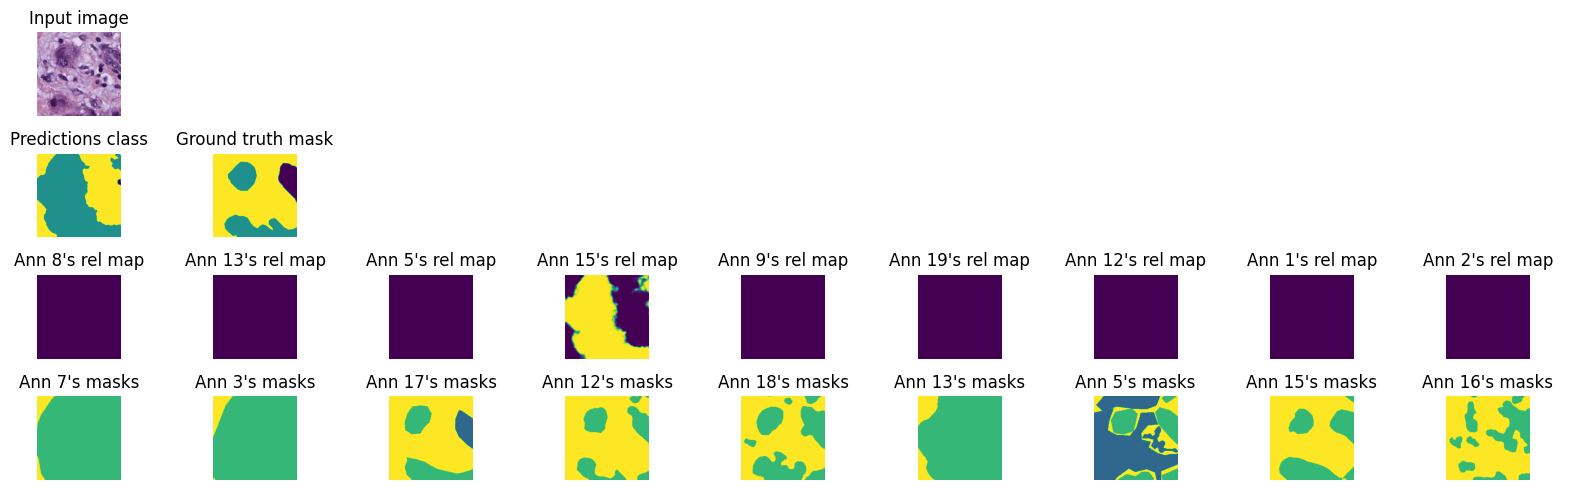

Train loss: 0.42760 | Time: 82m 49s | Val loss: 0.17007
Train_DICE_avg: 0.64081 | Train_Jaccard_avg: 0.55794 | Train_Sensitivity_avg: 0.75510 | Train_Specificity_avg: 0.86311 
Class 0 - Train_DICE: 0.40251 | Train_Jaccard: 0.37430 | Train_Sensitivity: 0.68064 | Train_Specificity: 0.96766 
Class 1 - Train_DICE: 0.80247 | Train_Jaccard: 0.69932 | Train_Sensitivity: 0.82941 | Train_Specificity: 0.81144 
Class 2 - Train_DICE: 0.71744 | Train_Jaccard: 0.60020 | Train_Sensitivity: 0.75527 | Train_Specificity: 0.81022 
Val_DICE_avg: 0.67352 | Val_Jaccard_avg: 0.59378 | Val_Sensitivity_avg: 0.74137 | Val_Specificity_avg: 0.85983 
Class 0 - Val_DICE: 0.50205 | Val_Jaccard: 0.47870 | Val_Sensitivity: 0.63282 | Val_Specificity: 0.96934 
Class 1 - Val_DICE: 0.82313 | Val_Jaccard: 0.71944 | Val_Sensitivity: 0.86270 | Val_Specificity: 0.78414 
Class 2 - Val_DICE: 0.69537 | Val_Jaccard: 0.58319 | Val_Sensitivity: 0.72860 | Val_Specificity: 0.82601 

Epoch 52/61


Validation Epoch 52/61: 100%|██████████| 8/8 [00:08<00:00,  1.09s/it]


Train loss: 0.42487 | Time: 84m 26s | Val loss: 0.17050
Train_DICE_avg: 0.64572 | Train_Jaccard_avg: 0.56333 | Train_Sensitivity_avg: 0.75570 | Train_Specificity_avg: 0.86378 
Class 0 - Train_DICE: 0.41582 | Train_Jaccard: 0.38788 | Train_Sensitivity: 0.67997 | Train_Specificity: 0.96654 
Class 1 - Train_DICE: 0.80700 | Train_Jaccard: 0.70488 | Train_Sensitivity: 0.83621 | Train_Specificity: 0.81275 
Class 2 - Train_DICE: 0.71434 | Train_Jaccard: 0.59723 | Train_Sensitivity: 0.75091 | Train_Specificity: 0.81206 
Val_DICE_avg: 0.66682 | Val_Jaccard_avg: 0.58688 | Val_Sensitivity_avg: 0.74045 | Val_Specificity_avg: 0.86031 
Class 0 - Val_DICE: 0.47964 | Val_Jaccard: 0.45706 | Val_Sensitivity: 0.62743 | Val_Specificity: 0.97077 
Class 1 - Val_DICE: 0.81848 | Val_Jaccard: 0.71408 | Val_Sensitivity: 0.84211 | Val_Specificity: 0.80514 
Class 2 - Val_DICE: 0.70234 | Val_Jaccard: 0.58952 | Val_Sensitivity: 0.75180 | Val_Specificity: 0.80501 

Epoch 53/61


Validation Epoch 53/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Train loss: 0.42419 | Time: 86m 2s | Val loss: 0.17100
Train_DICE_avg: 0.63978 | Train_Jaccard_avg: 0.55709 | Train_Sensitivity_avg: 0.75452 | Train_Specificity_avg: 0.86308 
Class 0 - Train_DICE: 0.39664 | Train_Jaccard: 0.36956 | Train_Sensitivity: 0.67429 | Train_Specificity: 0.96772 
Class 1 - Train_DICE: 0.80619 | Train_Jaccard: 0.70294 | Train_Sensitivity: 0.83710 | Train_Specificity: 0.80819 
Class 2 - Train_DICE: 0.71652 | Train_Jaccard: 0.59876 | Train_Sensitivity: 0.75219 | Train_Specificity: 0.81333 
Val_DICE_avg: 0.67354 | Val_Jaccard_avg: 0.59331 | Val_Sensitivity_avg: 0.74145 | Val_Specificity_avg: 0.85950 
Class 0 - Val_DICE: 0.50132 | Val_Jaccard: 0.47850 | Val_Sensitivity: 0.63048 | Val_Specificity: 0.97331 
Class 1 - Val_DICE: 0.82424 | Val_Jaccard: 0.72046 | Val_Sensitivity: 0.87327 | Val_Specificity: 0.77204 
Class 2 - Val_DICE: 0.69506 | Val_Jaccard: 0.58098 | Val_Sensitivity: 0.72060 | Val_Specificity: 0.83313 

Epoch 54/61


Validation Epoch 54/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


Train loss: 0.42643 | Time: 87m 41s | Val loss: 0.17106
Train_DICE_avg: 0.64240 | Train_Jaccard_avg: 0.55990 | Train_Sensitivity_avg: 0.75587 | Train_Specificity_avg: 0.86398 
Class 0 - Train_DICE: 0.40122 | Train_Jaccard: 0.37388 | Train_Sensitivity: 0.67805 | Train_Specificity: 0.96517 
Class 1 - Train_DICE: 0.80833 | Train_Jaccard: 0.70574 | Train_Sensitivity: 0.83808 | Train_Specificity: 0.81031 
Class 2 - Train_DICE: 0.71764 | Train_Jaccard: 0.60009 | Train_Sensitivity: 0.75149 | Train_Specificity: 0.81646 
Val_DICE_avg: 0.67229 | Val_Jaccard_avg: 0.59197 | Val_Sensitivity_avg: 0.73841 | Val_Specificity_avg: 0.85743 
Class 0 - Val_DICE: 0.50482 | Val_Jaccard: 0.48251 | Val_Sensitivity: 0.62778 | Val_Specificity: 0.97109 
Class 1 - Val_DICE: 0.82194 | Val_Jaccard: 0.71805 | Val_Sensitivity: 0.87355 | Val_Specificity: 0.76640 
Class 2 - Val_DICE: 0.69013 | Val_Jaccard: 0.57534 | Val_Sensitivity: 0.71391 | Val_Specificity: 0.83481 

Epoch 55/61


Validation Epoch 55/61: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


Train loss: 0.42053 | Time: 89m 16s | Val loss: 0.17001
Train_DICE_avg: 0.64351 | Train_Jaccard_avg: 0.56092 | Train_Sensitivity_avg: 0.75392 | Train_Specificity_avg: 0.86291 
Class 0 - Train_DICE: 0.41060 | Train_Jaccard: 0.38326 | Train_Sensitivity: 0.67638 | Train_Specificity: 0.96715 
Class 1 - Train_DICE: 0.80754 | Train_Jaccard: 0.70454 | Train_Sensitivity: 0.84120 | Train_Specificity: 0.80398 
Class 2 - Train_DICE: 0.71240 | Train_Jaccard: 0.59495 | Train_Sensitivity: 0.74418 | Train_Specificity: 0.81761 
Val_DICE_avg: 0.67593 | Val_Jaccard_avg: 0.59549 | Val_Sensitivity_avg: 0.73989 | Val_Specificity_avg: 0.85837 
Class 0 - Val_DICE: 0.51473 | Val_Jaccard: 0.49120 | Val_Sensitivity: 0.63685 | Val_Specificity: 0.96710 
Class 1 - Val_DICE: 0.82534 | Val_Jaccard: 0.72116 | Val_Sensitivity: 0.88148 | Val_Specificity: 0.76134 
Class 2 - Val_DICE: 0.68772 | Val_Jaccard: 0.57411 | Val_Sensitivity: 0.70133 | Val_Specificity: 0.84668 

Epoch 56/61


Validation Epoch 56/61: 100%|██████████| 8/8 [00:08<00:00,  1.11s/it]


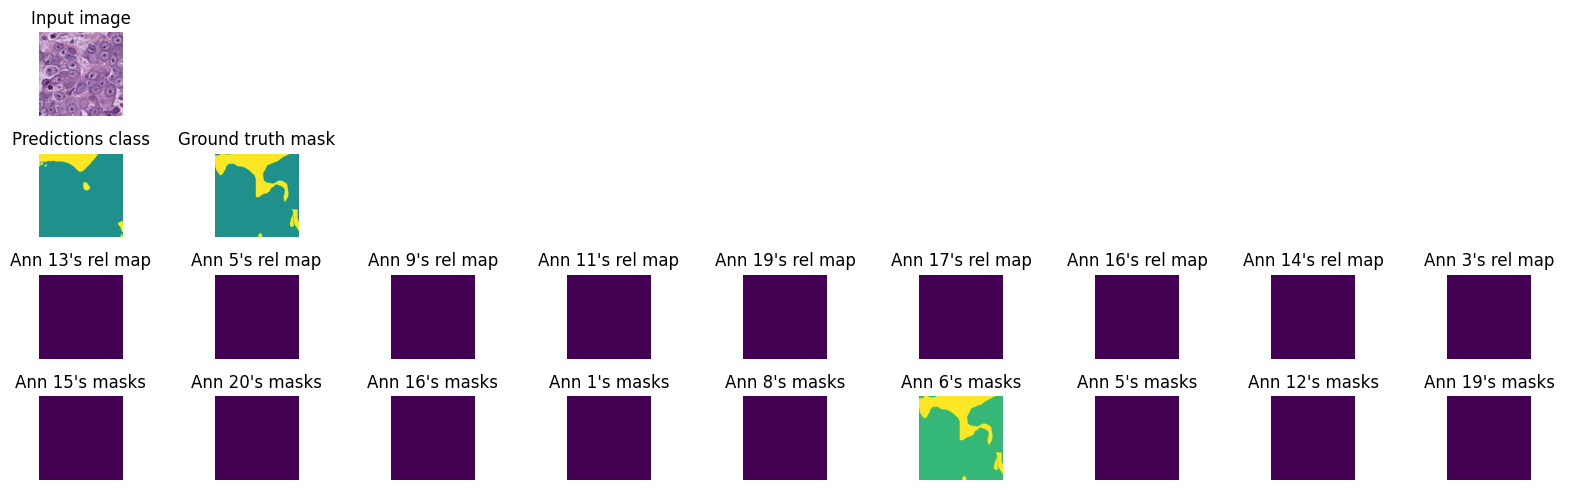

Train loss: 0.42784 | Time: 90m 53s | Val loss: 0.17031
Train_DICE_avg: 0.64332 | Train_Jaccard_avg: 0.56086 | Train_Sensitivity_avg: 0.75618 | Train_Specificity_avg: 0.86444 
Class 0 - Train_DICE: 0.40527 | Train_Jaccard: 0.37723 | Train_Sensitivity: 0.67958 | Train_Specificity: 0.96506 
Class 1 - Train_DICE: 0.80755 | Train_Jaccard: 0.70448 | Train_Sensitivity: 0.83459 | Train_Specificity: 0.81433 
Class 2 - Train_DICE: 0.71713 | Train_Jaccard: 0.60087 | Train_Sensitivity: 0.75436 | Train_Specificity: 0.81392 
Val_DICE_avg: 0.67226 | Val_Jaccard_avg: 0.59093 | Val_Sensitivity_avg: 0.74253 | Val_Specificity_avg: 0.86064 
Class 0 - Val_DICE: 0.49848 | Val_Jaccard: 0.47332 | Val_Sensitivity: 0.63988 | Val_Specificity: 0.96655 
Class 1 - Val_DICE: 0.82029 | Val_Jaccard: 0.71614 | Val_Sensitivity: 0.85350 | Val_Specificity: 0.79488 
Class 2 - Val_DICE: 0.69800 | Val_Jaccard: 0.58334 | Val_Sensitivity: 0.73421 | Val_Specificity: 0.82050 

Epoch 57/61


Validation Epoch 57/61: 100%|██████████| 8/8 [00:08<00:00,  1.06s/it]


Train loss: 0.42648 | Time: 92m 29s | Val loss: 0.17010
Train_DICE_avg: 0.63033 | Train_Jaccard_avg: 0.54794 | Train_Sensitivity_avg: 0.75464 | Train_Specificity_avg: 0.86314 
Class 0 - Train_DICE: 0.36767 | Train_Jaccard: 0.34003 | Train_Sensitivity: 0.67496 | Train_Specificity: 0.96449 
Class 1 - Train_DICE: 0.80726 | Train_Jaccard: 0.70488 | Train_Sensitivity: 0.83848 | Train_Specificity: 0.80837 
Class 2 - Train_DICE: 0.71605 | Train_Jaccard: 0.59890 | Train_Sensitivity: 0.75048 | Train_Specificity: 0.81657 
Val_DICE_avg: 0.67613 | Val_Jaccard_avg: 0.59587 | Val_Sensitivity_avg: 0.73989 | Val_Specificity_avg: 0.85866 
Class 0 - Val_DICE: 0.51237 | Val_Jaccard: 0.49016 | Val_Sensitivity: 0.62728 | Val_Specificity: 0.97205 
Class 1 - Val_DICE: 0.82350 | Val_Jaccard: 0.71959 | Val_Sensitivity: 0.87267 | Val_Specificity: 0.77263 
Class 2 - Val_DICE: 0.69254 | Val_Jaccard: 0.57786 | Val_Sensitivity: 0.71973 | Val_Specificity: 0.83129 

Epoch 58/61


Validation Epoch 58/61: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


Train loss: 0.42825 | Time: 94m 4s | Val loss: 0.17061
Train_DICE_avg: 0.63331 | Train_Jaccard_avg: 0.55123 | Train_Sensitivity_avg: 0.75803 | Train_Specificity_avg: 0.86531 
Class 0 - Train_DICE: 0.37174 | Train_Jaccard: 0.34420 | Train_Sensitivity: 0.68030 | Train_Specificity: 0.96459 
Class 1 - Train_DICE: 0.80946 | Train_Jaccard: 0.70716 | Train_Sensitivity: 0.83798 | Train_Specificity: 0.81444 
Class 2 - Train_DICE: 0.71874 | Train_Jaccard: 0.60232 | Train_Sensitivity: 0.75581 | Train_Specificity: 0.81691 
Val_DICE_avg: 0.66310 | Val_Jaccard_avg: 0.58205 | Val_Sensitivity_avg: 0.74044 | Val_Specificity_avg: 0.86002 
Class 0 - Val_DICE: 0.47327 | Val_Jaccard: 0.44893 | Val_Sensitivity: 0.63708 | Val_Specificity: 0.96420 
Class 1 - Val_DICE: 0.82190 | Val_Jaccard: 0.71751 | Val_Sensitivity: 0.86072 | Val_Specificity: 0.78696 
Class 2 - Val_DICE: 0.69415 | Val_Jaccard: 0.57972 | Val_Sensitivity: 0.72353 | Val_Specificity: 0.82889 

Epoch 59/61


Validation Epoch 59/61: 100%|██████████| 8/8 [00:08<00:00,  1.08s/it]


Train loss: 0.41666 | Time: 95m 40s | Val loss: 0.17064
Train_DICE_avg: 0.63692 | Train_Jaccard_avg: 0.55546 | Train_Sensitivity_avg: 0.75690 | Train_Specificity_avg: 0.86459 
Class 0 - Train_DICE: 0.38221 | Train_Jaccard: 0.35510 | Train_Sensitivity: 0.67585 | Train_Specificity: 0.96528 
Class 1 - Train_DICE: 0.80889 | Train_Jaccard: 0.70802 | Train_Sensitivity: 0.84004 | Train_Specificity: 0.81080 
Class 2 - Train_DICE: 0.71965 | Train_Jaccard: 0.60325 | Train_Sensitivity: 0.75483 | Train_Specificity: 0.81768 
Val_DICE_avg: 0.67380 | Val_Jaccard_avg: 0.59278 | Val_Sensitivity_avg: 0.74188 | Val_Specificity_avg: 0.86078 
Class 0 - Val_DICE: 0.50025 | Val_Jaccard: 0.47628 | Val_Sensitivity: 0.63557 | Val_Specificity: 0.96762 
Class 1 - Val_DICE: 0.82243 | Val_Jaccard: 0.71846 | Val_Sensitivity: 0.85963 | Val_Specificity: 0.78922 
Class 2 - Val_DICE: 0.69873 | Val_Jaccard: 0.58359 | Val_Sensitivity: 0.73045 | Val_Specificity: 0.82549 

Epoch 60/61


Validation Epoch 60/61: 100%|██████████| 8/8 [00:09<00:00,  1.14s/it]


Train loss: 0.42872 | Time: 97m 18s | Val loss: 0.17087
Train_DICE_avg: 0.63434 | Train_Jaccard_avg: 0.55212 | Train_Sensitivity_avg: 0.75592 | Train_Specificity_avg: 0.86497 
Class 0 - Train_DICE: 0.37249 | Train_Jaccard: 0.34505 | Train_Sensitivity: 0.67430 | Train_Specificity: 0.96338 
Class 1 - Train_DICE: 0.80969 | Train_Jaccard: 0.70801 | Train_Sensitivity: 0.83903 | Train_Specificity: 0.81423 
Class 2 - Train_DICE: 0.72083 | Train_Jaccard: 0.60330 | Train_Sensitivity: 0.75445 | Train_Specificity: 0.81729 
Val_DICE_avg: 0.65904 | Val_Jaccard_avg: 0.57670 | Val_Sensitivity_avg: 0.74223 | Val_Specificity_avg: 0.86028 
Class 0 - Val_DICE: 0.46129 | Val_Jaccard: 0.43365 | Val_Sensitivity: 0.64791 | Val_Specificity: 0.96215 
Class 1 - Val_DICE: 0.82066 | Val_Jaccard: 0.71651 | Val_Sensitivity: 0.85330 | Val_Specificity: 0.79478 
Class 2 - Val_DICE: 0.69517 | Val_Jaccard: 0.57994 | Val_Sensitivity: 0.72548 | Val_Specificity: 0.82389 

Epoch 61/61


Validation Epoch 61/61: 100%|██████████| 8/8 [00:09<00:00,  1.16s/it]


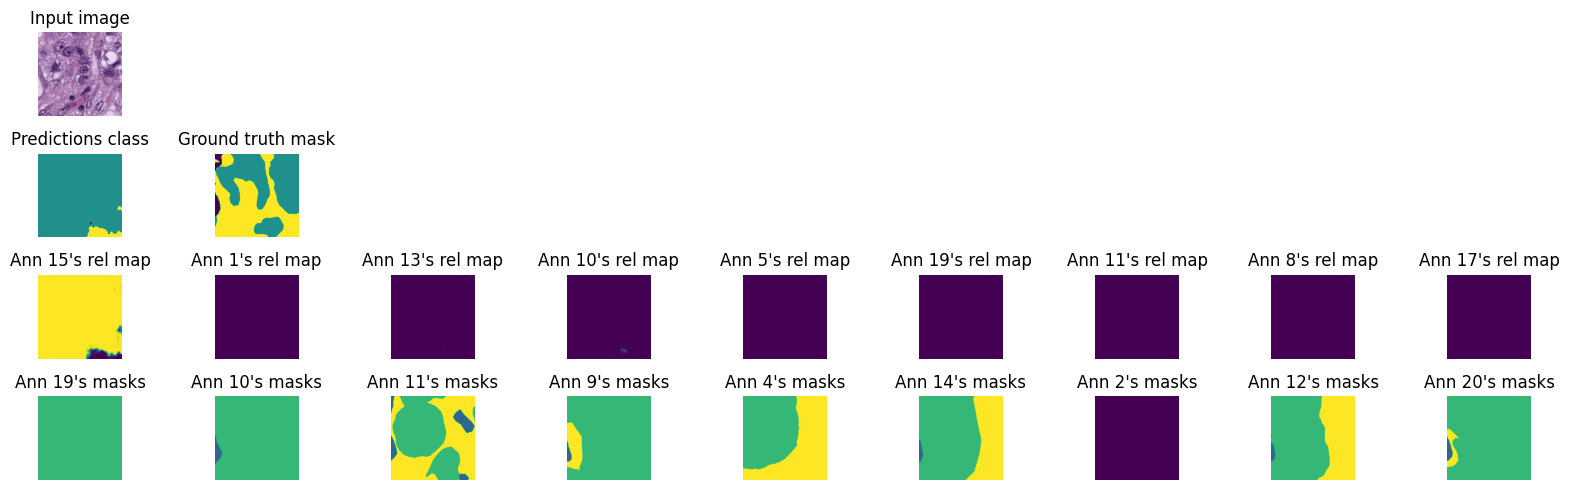

Train loss: 0.42602 | Time: 98m 58s | Val loss: 0.17086
Train_DICE_avg: 0.62841 | Train_Jaccard_avg: 0.54607 | Train_Sensitivity_avg: 0.75564 | Train_Specificity_avg: 0.86339 
Class 0 - Train_DICE: 0.36082 | Train_Jaccard: 0.33294 | Train_Sensitivity: 0.67863 | Train_Specificity: 0.96476 
Class 1 - Train_DICE: 0.80673 | Train_Jaccard: 0.70487 | Train_Sensitivity: 0.83334 | Train_Specificity: 0.81402 
Class 2 - Train_DICE: 0.71767 | Train_Jaccard: 0.60040 | Train_Sensitivity: 0.75495 | Train_Specificity: 0.81140 
Val_DICE_avg: 0.66862 | Val_Jaccard_avg: 0.58621 | Val_Sensitivity_avg: 0.74114 | Val_Specificity_avg: 0.85897 
Class 0 - Val_DICE: 0.49036 | Val_Jaccard: 0.46425 | Val_Sensitivity: 0.63750 | Val_Specificity: 0.96736 
Class 1 - Val_DICE: 0.81850 | Val_Jaccard: 0.71337 | Val_Sensitivity: 0.85517 | Val_Specificity: 0.78868 
Class 2 - Val_DICE: 0.69701 | Val_Jaccard: 0.58101 | Val_Sensitivity: 0.73075 | Val_Specificity: 0.82087 


wandb: uploading artifact best_model
wandb:                                                                                
wandb: 
wandb: Run history:
wandb:          Training DICE ▁▁▃▄▄▅▆▆▇▇█████▇▆▆▆▅▅▄▄▆▄▄▅▅▆▅▅▅▅▆▆▆▆▅▅▅
wandb:       Training Jaccard ▁▁▁▃▄▄▅▆▇▇█████▆▆▆▆▅▅▄▄▆▄▄▅▅▅▅▅▅▅▆▆▆▆▅▅▅
wandb:          Training Loss ██▇▇▇▆▅▅▄▄▃▃▃▂▁▁▂▁▁▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb:   Training Sensitivity ▁▂▄▄▄▄▅▅▅▅▅▆▆▆▆▆▆▇▇▇▇▇▇▇▇▇▇▇████████████
wandb:   Training Specificity ▅▆▄▁▁▁▁▁▂▃▃▄▄▄▅▅▆▆▆▆▆▆▆▆▇▇▇▇▇▇▇██▇██████
wandb:        Validation DICE ▂▁▁▃▃▆▆▆▇█▇▇█▇▇▇▇▆▇▇▇▇█▇█▇▇▇▇▇▇█▇▇▇▇▇▆▇▇
wandb:     Validation Jaccard ▂▁▃▃▅▆▆▆▆▇█▇▇▇▇▆▇▆▇███▇▇▇▇▇█▇▇█▇▇▇▇▇▇▇▇▇
wandb:        Validation Loss ██▇▇▆▅▅▄▃▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
wandb: Validation Sensitivity ▃▁▃▅▅▆▆▆▇▇▇▇▇▇▇▇▇███████▇███████████████
wandb: Validation Specificity ▃▆█▂▂▁▁▂▂▃▄▃▄▄▃▄▅▄▄▄▅▅▅▅▅▅▅▅▅▅▅▆▅▅▅▅▅▆▅▆
wandb: 
wandb: Run summary:
wandb:          Training DICE 0.62841
wandb:       Training Jaccard 0.54607
wandb:          Training Loss 0.42


Training complete!


In [ ]:
trainer = AnnotHarmonyTrainer(train_loader=train_dataset,valid_loader=valid_dataset,config=config)
trainer.start()

In [11]:
model = AnnotHarmonyModel(in_ch=config["Input size"][0],
                          out_ch=config['Number of classes'],
                          n_annotators=config['Num of annotators'],
                          activation_seg=config['Activation seg'],
                          activation_rel=config['Activation rel']
                         )
state_dict = torch.load('./models/best_model.pt', weights_only=True)
model.load_state_dict(state_dict)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:00<00:00, 181MB/s]


<All keys matched successfully>

In [ ]:
PerformanceAnnotHarmony(model=model,test_dataset=test_dataset,config=config)

Testing model's performance: 100%|██████████| 8/8 [00:16<00:00,  2.00s/it]



Global Performance Metrics:
Loss mean: 0.18228, std: 0.19902
Dice mean: 0.66776, std: 0.07450
Jaccard mean: 0.58220, std: 0.07889
Sensitivity mean: 0.72156, std: 0.06703
Specificity mean: 0.85004, std: 0.02305

Per-Class Performance Metrics:

Class 0:
Dice mean: 0.53463, std: 0.15864
Jaccard mean: 0.50485, std: 0.16340
Sensitivity mean: 0.63193, std: 0.15198
Specificity mean: 0.96263, std: 0.01043

Class 1:
Dice mean: 0.78023, std: 0.03102
Jaccard mean: 0.67269, std: 0.03913
Sensitivity mean: 0.82383, std: 0.02809
Specificity mean: 0.77568, std: 0.06866

Class 2:
Dice mean: 0.68842, std: 0.06340
Jaccard mean: 0.56906, std: 0.07123
Sensitivity mean: 0.70892, std: 0.06586
Specificity mean: 0.81182, std: 0.02253
